# Ensemble Techniques
Problem Statement : Explore Ensemble Techniques with PCA dimensionality reduction as pre-processing 

A collection of several models working together on a single set is called an ensemble. The method is called Ensemble Learning. It is much more useful use all different models rather than any one.

Why ensembles?
1. Lower error
2. Less over-fitting
3. Better generalization 

# Pre-requisite:
Ensure datafolder and required csv datafile is in place before running the code. 
If you are running this notebook into Jupyter notebook, ensure to mount the drive and file exists on the drive.

In [1]:
#Modify the directory & File name based on your local paths & file name
dataFolder = "C:/Users/shaaruns.CORPDOM/Documents/BITS_Assignments/Module-7/Gr20_Cap4_Sourcecode/Grp20_Cohert3_Final_Submission"
datafile = "Output_CSV/Dataset_Step4_Processed_Data_Revised.csv"

In [2]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

In [3]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
print('pandas  : {}'.format(pd.__version__)) #Rationale 
import numpy as np
print ('numpy   : {}'.format(np.__version__))
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


pandas  : 0.25.1
numpy   : 1.19.4


In [5]:
#Read the dataset from clean datafile
df_train = pd.read_csv(dataFolder +'/' + datafile)
df_train.head()
#Read the dataset from GDrive
#Inputfile = 'drive/My Drive/Colab_Notebooks/Input_Dataset_Without_TF-IDF.csv'
#df_train = pd.read_csv(Inputfile)
#df_train.head()



,Consumerdisputed,ComplaintID,Month_Received,Year_Sent,Month_Sent,Day_Sent,Week_Received,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,...,Feature109,Feature110,Feature111,Feature112,Feature113,Feature114,Feature115,Feature116,Feature117,Feature118
0,1,1347613,4,2015,4,26,4,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.0
1,1,1685130,12,2015,12,7,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,1,10631,1,2012,1,9,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,1,1489180,7,2015,7,27,4,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,1,795636,4,2014,4,6,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


# Feature Scaling of train Data Sets except Target and Indent variable

In [6]:
df_train.shape

(100311, 142)

In [7]:
df_train.columns

Index(['Consumerdisputed', 'ComplaintID', 'Month_Received', 'Year_Sent',
       'Month_Sent', 'Day_Sent', 'Week_Received', 'Product_Consumer Loan',
       'Product_Credit card', 'Product_Credit reporting',
       ...
       'Feature109', 'Feature110', 'Feature111', 'Feature112', 'Feature113',
       'Feature114', 'Feature115', 'Feature116', 'Feature117', 'Feature118'],
      dtype='object', length=142)

In [8]:
df_train.rename(columns = {'Complaint ID':'ComplaintID'}, inplace = True)

In [9]:
temp = df_train.copy()

In [10]:
colsTobedropped = ['Consumerdisputed', 
                  'ComplaintID'
                             ]



temp  = temp.drop(colsTobedropped,axis = 1)
print(temp.columns)

Index(['Month_Received', 'Year_Sent', 'Month_Sent', 'Day_Sent',
       'Week_Received', 'Product_Consumer Loan', 'Product_Credit card',
       'Product_Credit reporting', 'Product_Debt collection',
       'Product_Mortgage',
       ...
       'Feature109', 'Feature110', 'Feature111', 'Feature112', 'Feature113',
       'Feature114', 'Feature115', 'Feature116', 'Feature117', 'Feature118'],
      dtype='object', length=140)


In [11]:
temp.shape

(100311, 140)

In [12]:
scaledCols = temp.columns

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train[scaledCols] = scaler.fit_transform(df_train[scaledCols])

In [14]:
df_train.shape

(100311, 142)

In [15]:
#Final X training Data
X = df_train.reindex(columns=scaledCols)

#Target Y Variable Consumer disputed as 0 or 1
y = df_train['Consumerdisputed'].values

#Preserving ComplaintID for providing final output results, will not be used for training data
p_ComplaintID = df_train['ComplaintID'].values

In [16]:
df_train.columns

Index(['Consumerdisputed', 'ComplaintID', 'Month_Received', 'Year_Sent',
       'Month_Sent', 'Day_Sent', 'Week_Received', 'Product_Consumer Loan',
       'Product_Credit card', 'Product_Credit reporting',
       ...
       'Feature109', 'Feature110', 'Feature111', 'Feature112', 'Feature113',
       'Feature114', 'Feature115', 'Feature116', 'Feature117', 'Feature118'],
      dtype='object', length=142)

In [17]:
# Split the dataframe 80:20 preserve the distribution of class - use stratify

_train, X_val, y_train, y_test , trainComplaintID , valComplaintID = train_test_split(df_train, y, p_ComplaintID , test_size = 0.3,random_state = 17 , stratify = df_train['Consumerdisputed'])


In [18]:
#checking y_train distribution
print("y_train distribution of label '1': {} \n".format(sum(y_train == 1))) 
print("y_train distribution of label '0': {} \n".format(sum(y_train == 0)))


#checking y_train distribution
print("y_test distribution of label '1': {} \n".format(sum(y_test == 1))) 
print("y_test distribution of label '0': {} \n".format(sum(y_test == 0)))

y_train distribution of label '1': 21474 

y_train distribution of label '0': 48743 

y_test distribution of label '1': 9203 

y_test distribution of label '0': 20891 



# Dimensional reduction and features selection¶

In [19]:
pca_columns = []
for i in range(X.shape[1]):
    pca_columns.append('PC' + str(i+1))
    
pca_model = PCA()
pca_model.fit(X)
X_pca_train = pd.DataFrame(pca_model.transform(X), columns = pca_columns)
X_pca_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC131,PC132,PC133,PC134,PC135,PC136,PC137,PC138,PC139,PC140
0,-0.395199,0.204979,0.348880,-0.534124,-0.400318,-0.603641,0.152747,-0.255859,0.222264,0.291854,...,2.452538e-17,-4.867452e-17,-1.868223e-17,4.791652e-17,3.535155e-17,-5.924497e-18,1.122379e-16,1.362545e-16,-5.701951e-18,2.648196e-17
1,-0.450109,0.300232,0.570239,-0.731279,-0.371584,0.503156,-0.586396,0.568685,-0.363832,-0.102477,...,-2.607731e-16,-1.476949e-17,3.896285e-18,5.946327e-17,-1.473859e-17,2.624198e-17,-5.281835e-17,3.794682e-16,4.405015e-16,7.371252e-17
2,0.050268,0.258965,0.237108,-0.552120,0.721765,0.282272,-0.619973,-0.643885,1.836435,-0.939509,...,-4.480003e-17,-1.500779e-16,4.281914e-17,-1.372038e-17,3.860415e-17,-3.255826e-16,9.983731e-17,-8.023354e-17,-9.292602e-17,-2.516672e-17
3,-0.045776,0.248927,0.260345,-0.566060,0.656803,-0.620803,0.042442,0.187712,0.520280,-0.220983,...,2.805836e-17,2.960171e-16,1.462989e-17,-3.041709e-17,-2.270268e-18,2.069716e-17,9.376578e-17,-1.648013e-16,1.004957e-16,-1.177576e-16
4,1.451888,-0.846634,-0.160931,-0.571713,-0.074824,0.620269,-0.052431,-0.357547,-0.100975,-0.046934,...,3.586461e-17,2.339443e-17,-2.283668e-18,3.918869e-17,1.388434e-17,1.652779e-17,-2.853222e-17,4.987072e-17,-2.527180e-17,5.723264e-17


In [20]:
explained_info_train = pd.DataFrame(pca_model.explained_variance_ratio_, columns=['Explained Info']).sort_values(by = 'Explained Info', ascending = False)
imp = []
for i in range(explained_info_train.shape[0]):
    imp.append(explained_info_train.head(i).sum())
explained_info_train_sum = pd.DataFrame()
explained_info_train_sum['Variable'] = pca_columns
explained_info_train_sum['Importance'] = imp
explained_info_train_sum.head(60)

,Variable,Importance
0,PC1,Explained Info 0.0 dtype: float64
1,PC2,Explained Info 0.204761 dtype: float64
2,PC3,Explained Info 0.31747 dtype: float64
3,PC4,Explained Info 0.401489 dtype: float64
4,PC5,Explained Info 0.471021 dtype: float64
5,PC6,Explained Info 0.527071 dtype: float64
6,PC7,Explained Info 0.568048 dtype: float64
7,PC8,Explained Info 0.608649 dtype: float64
8,PC9,Explained Info 0.64717 dtype: float64
9,PC10,Explained Info 0.678818 dtype: float64


In [21]:
pca_columns = []
for i in range(25):
    pca_columns.append('PC' + str(i+1))
pca_model = PCA(n_components = 25)
pca_model.fit(X)
df_pca_train = pd.DataFrame(pca_model.transform(X), columns = pca_columns)

In [22]:
df_pca_train.head(1)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,-0.395199,0.204979,0.34888,-0.534124,-0.400318,-0.603641,0.152747,-0.255859,0.222265,0.291854,...,-0.511905,-0.706584,-0.034711,0.03252,0.213767,-0.163489,0.007273,-0.094949,-0.039584,-0.010531


In [23]:
x_train, x_test, y_train, y_test , trainComplaintID , valComplaintID = train_test_split(df_pca_train, y, p_ComplaintID , test_size = 0.3,random_state = 17 , stratify = df_train['Consumerdisputed'])

In [24]:
#checking y_train distribution
print("y_train distribution of label '1': {} \n".format(sum(y_train == 1))) 
print("y_train distribution of label '0': {} \n".format(sum(y_train == 0)))


#checking y_train distribution
print("y_test distribution of label '1': {} \n".format(sum(y_test == 1))) 
print("y_test distribution of label '0': {} \n".format(sum(y_test == 0)))


y_train distribution of label '1': 21474 

y_train distribution of label '0': 48743 

y_test distribution of label '1': 9203 

y_test distribution of label '0': 20891 



In [25]:
x_test.shape

(30094, 25)

In [26]:
totalFeature = x_train.columns
len(totalFeature)

25

<class 'pandas.core.frame.DataFrame'>


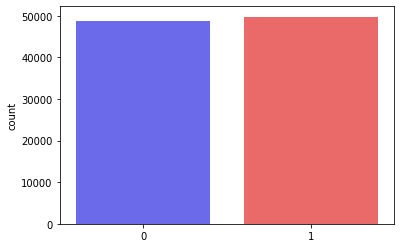

In [27]:
from imblearn.over_sampling import ADASYN
oversample = ADASYN()
x_train_res, y_train_res = oversample.fit_resample(x_train, y_train)
print (type(x_train_res))
sns.countplot(x=y_train_res, palette='seismic');

# Use Balanced Input Dataset with Ensemble Algorithms

In [28]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


In [29]:
def plot_roc_curve(model, yTest, yPred):
    fpr, tpr, thresholds = roc_curve(yTest, yPred)
    roc_auc = auc(fpr, tpr)
    lw = 2
    #print('AUC area:', roc_auc)
    Model_accuracy[model] = roc_auc_score(yTest,yPred)
    print('AUC roc_auc_score:', roc_auc_score(yTest,yPred))
    plt.plot([0,1],[0,1],'k--')
    #plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title(model)
    plt.show()
from sklearn.metrics import cohen_kappa_score
def getModelReport(modelName, yTest, yPredict) :
    accuracy = accuracy_score(yTest, yPredict)
    precision = precision_score(yTest, yPredict)
    recall = recall_score(yTest, yPredict)
    f1 = f1_score(yTest, yPredict)
    # Cohen's kappa
    cohenKappa = cohen_kappa_score(y_test, yPredict)
    conf_matrix = confusion_matrix(yTest, yPredict)
    clf_report = classification_report(yTest, yPredict)

    print('\n\n*************************************************************************************')
    print('FOR {0}:'.format(modelName))
    print('ACCURACY:', accuracy)
    print('F1 SCORE:', f1)
    print('CONFUSION MATRIX: ')
    print(conf_matrix)
    print('CLASSIFICATION REPORT: ')
    print(clf_report)
    #print('COHEN KAPPA SCORE: ')
    #print (cohenKappa)

    print('****************************************************************************************')


In [30]:
def write_predictions_to_csv(dataToWrite, file):
    fullAttrList = dataToWrite.keys()
    dfToWrite = pd.DataFrame( columns = fullAttrList)
    for key,val in dataToWrite.items():
        dfToWrite[key] = val
    dfToWrite.to_csv(file, index=False)    

In [31]:
SKLearn_Model_Data = {}
Model_accuracy = {}

In [32]:
print (x_train_res.shape)
print (y_train_res.shape)

(98524, 25)
(98524,)


In [33]:
def classification_report_csv(algo_name,y_test, y_predicted):
    #df_header = header_line_csv(algo_name)
    report = classification_report(y_test, y_predicted, output_dict=True,target_names=['Consumer Not Disputed', 'Consumer Disputed'])
    df = pd.DataFrame(report).transpose()
    df.insert(loc=0, column='Algorithm Name', value=algo_name)
    return df

Training Accuracy:  0.9119808371564289
Testing Accuarcy:  0.5873596065660929
              precision    recall  f1-score   support

           0       0.71      0.69      0.70     20891
           1       0.34      0.36      0.35      9203

    accuracy                           0.59     30094
   macro avg       0.52      0.52      0.52     30094
weighted avg       0.59      0.59      0.59     30094



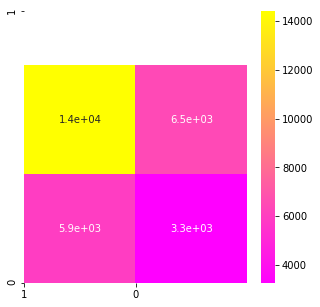

In [34]:
df_final = pd.DataFrame()
# Random Forest Classifier

from imblearn.ensemble import BalancedRandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
                 

model = BalancedRandomForestClassifier(n_estimators = 100, random_state = 0)

model.fit(x_train_res, y_train_res)
y_pred_rf = model.predict(x_test)


print("Training Accuracy: ", model.score(x_train_res, y_train_res))
print('Testing Accuarcy: ', model.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)
df = classification_report_csv("BalancedRandomForestClassifier",y_test, y_pred_rf)
df_final= pd.concat([df_final,df])

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'spring')
plt.xticks([0,1],labels=[1,0])
plt.yticks([-0.5,2.0],labels=[1,0])
plt.show()

AUC roc_auc_score: 0.5224794775558809


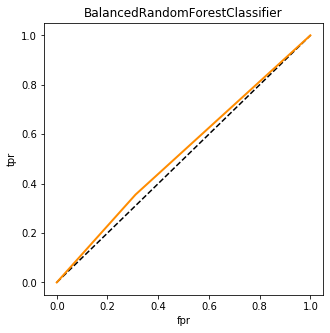

In [35]:
plot_roc_curve("BalancedRandomForestClassifier",y_test, y_pred_rf)

In [36]:
print ("Actual", y_test)
print ("Predicted", y_pred_rf)
print(y_test.shape)
print(y_pred_rf.shape)

Actual [0 0 0 ... 1 0 0]
Predicted [1 0 0 ... 1 1 1]
(30094,)
(30094,)


Training Accuracy:  0.8996082172871585
Testing Accuarcy:  0.586229813251811
              precision    recall  f1-score   support

           0       0.71      0.68      0.70     20891
           1       0.34      0.37      0.35      9203

    accuracy                           0.59     30094
   macro avg       0.52      0.53      0.52     30094
weighted avg       0.60      0.59      0.59     30094



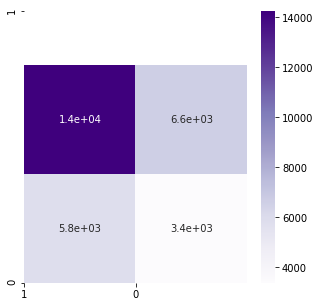

In [37]:
# Random Forest with Bagging Classifier

from imblearn.ensemble import BalancedBaggingClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
                 

model2 = BalancedBaggingClassifier(base_estimator = RandomForestClassifier(),
                                 sampling_strategy = 'auto',
                                 replacement = False,
                                 random_state = 0)

model2.fit(x_train_res, y_train_res)


print("Training Accuracy: ", model2.score(x_train_res, y_train_res))

print('Testing Accuarcy: ', model2.score(x_test, y_test))

y_pred_bc = model2.predict(x_test)
# making a classification report
cr = classification_report(y_test,  y_pred_bc)
print(cr)
df = classification_report_csv("BalancedBaggingClassifier",y_test,  y_pred_bc)
df_final= pd.concat([df_final,df])
# making a confusion matrix
cm = confusion_matrix(y_test, y_pred_bc)
sns.heatmap(cm, annot = True, cmap = 'Purples')
plt.xticks([0,1],labels=[1,0])
plt.yticks([-0.5,2.0],labels=[1,0])
plt.show()


AUC roc_auc_score: 0.525161311221713


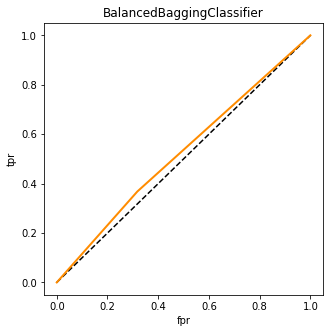

In [38]:
plot_roc_curve("BalancedBaggingClassifier",y_test,  y_pred_bc)

Training Accuracy:  0.5753521984491089
Testing Accuarcy:  0.5354888017545025
              precision    recall  f1-score   support

           0       0.77      0.47      0.58     20891
           1       0.36      0.68      0.47      9203

    accuracy                           0.54     30094
   macro avg       0.57      0.58      0.53     30094
weighted avg       0.65      0.54      0.55     30094



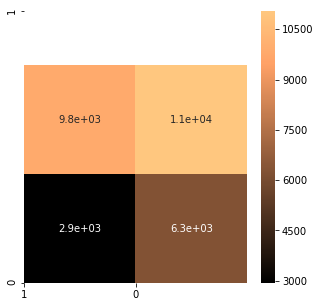

In [39]:
# Easy Ensemble Classifier

from imblearn.ensemble import EasyEnsembleClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
                 

model1 = EasyEnsembleClassifier(n_estimators = 100, random_state = 0)

model1.fit(x_train_res, y_train_res)
y_pred_ef = model1.predict(x_test)

print("Training Accuracy: ", model1.score(x_train_res, y_train_res))
print('Testing Accuarcy: ', model1.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_ef)
print(cr)
df = classification_report_csv("EasyEnsembleClassifier",y_test,  y_pred_ef)
df_final= pd.concat([df_final,df])

# making a confusion matrix
cm = confusion_matrix(y_test, y_pred_ef)
sns.heatmap(cm, annot = True, cmap = 'copper')
plt.xticks([0,1],labels=[1,0])
plt.yticks([-0.5,2.0],labels=[1,0])
plt.show()

AUC roc_auc_score: 0.5224794775558809


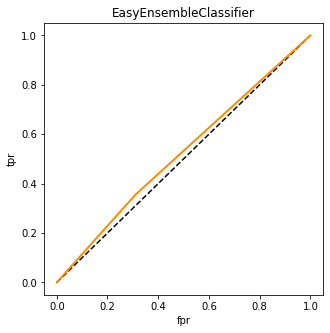

In [40]:
plot_roc_curve("EasyEnsembleClassifier",y_test,  y_pred_rf)

              precision    recall  f1-score   support

           0       0.71      0.70      0.71     20891
           1       0.34      0.35      0.34      9203

    accuracy                           0.59     30094
   macro avg       0.52      0.52      0.52     30094
weighted avg       0.60      0.59      0.59     30094



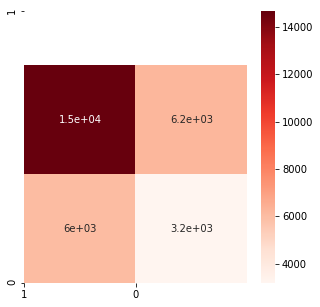

In [41]:
# boosting

y_pred = y_pred_rf*0.5 + y_pred_ef*0.2 + y_pred_bc*0.3

y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

# making a classification report
cr = classification_report(y_test,  y_pred)
print(cr)
df = classification_report_csv("Boosting",y_test,  y_pred)
df_final= pd.concat([df_final,df])

# making a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.xticks([0,1],labels=[1,0])
plt.yticks([-0.5,2.0],labels=[1,0])
plt.show()

AUC roc_auc_score: 0.5224794775558809


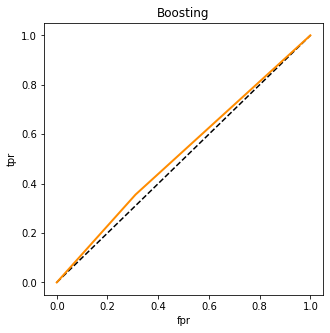

In [42]:
plot_roc_curve("Boosting",y_test,  y_pred_rf)

# Voting Classifier
Voting is one of the simplest way of combining the predictions from multiple machine learning algorithms. Voting classifier isn’t an actual classifier but a wrapper for set of different ones that are trained and valuated in parallel in order to exploit the different peculiarities of each algorithm.

Hard voting : The simplest case of majority voting. In this case, the class that received the highest number of votes Nc​(y​​t) will be chosen. Here we predict the class label y^ via majority voting of each classifier.

Soft voting : In this case, the probability vector for each predicted class (for all classifiers) are summed up &averaged. The winning class is the one corresponding to the highest value (only recommended if the classifiers are well calibrated).


              precision    recall  f1-score   support

           0       0.71      0.69      0.70     20891
           1       0.33      0.35      0.34      9203

    accuracy                           0.59     30094
   macro avg       0.52      0.52      0.52     30094
weighted avg       0.59      0.59      0.59     30094



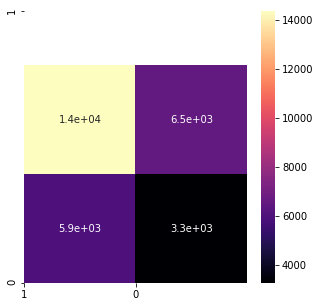

In [43]:
from sklearn.ensemble import VotingClassifier

vote_est = [ 
    ('brf', BalancedRandomForestClassifier()),
    ('bc', BalancedBaggingClassifier()),
    ('eec',EasyEnsembleClassifier())]

voting = VotingClassifier(estimators = vote_est , voting = 'soft')


voting.fit(x_train_res, y_train_res)

y_pred = voting.predict(x_test).astype(int)

# making a classification report
cr = classification_report(y_test,  y_pred)
print(cr)
df = classification_report_csv("VotingClassifier",y_test,  y_pred)
df_final= pd.concat([df_final,df])

# making a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'magma')
plt.xticks([0,1],labels=[1,0])
plt.yticks([-0.5,2.0],labels=[1,0])
plt.show()

AUC roc_auc_score: 0.5224794775558809


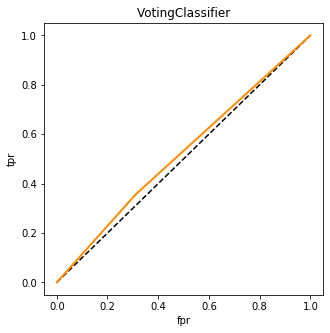

In [44]:
plot_roc_curve("VotingClassifier",y_test,  y_pred_rf)

In [45]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter("PCA_Ensemble_Output.xlsx", engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df_final.to_excel(writer, sheet_name="PCA_Ensemble_Output")

# Close the Pandas Excel writer and output the Excel file.
writer.save()

# Predicting probabilities - Easy Ensemble Classifier

In [46]:
#predicting probabilities
prob=model1.predict_proba(x_test)
print(prob)

[[0.49864629 0.50135371]
 [0.4988528  0.5011472 ]
 [0.49865899 0.50134101]
 ...
 [0.50026063 0.49973937]
 [0.49824408 0.50175592]
 [0.50283996 0.49716004]]


In [47]:
print(*prob)

[0.49864629 0.50135371] [0.4988528 0.5011472] [0.49865899 0.50134101] [0.49926575 0.50073425] [0.50093128 0.49906872] [0.49792552 0.50207448] [0.50046765 0.49953235] [0.49824811 0.50175189] [0.5024453 0.4975547] [0.50106559 0.49893441] [0.49856976 0.50143024] [0.49850292 0.50149708] [0.4988399 0.5011601] [0.50245678 0.49754322] [0.50065844 0.49934156] [0.49961607 0.50038393] [0.4994168 0.5005832] [0.49741684 0.50258316] [0.49862059 0.50137941] [0.50098882 0.49901118] [0.50087201 0.49912799] [0.4979119 0.5020881] [0.50226473 0.49773527] [0.49767485 0.50232515] [0.49954063 0.50045937] [0.49976602 0.50023398] [0.50452982 0.49547018] [0.49937198 0.50062802] [0.50131571 0.49868429] [0.500732 0.499268] [0.49826827 0.50173173] [0.49864483 0.50135517] [0.49894138 0.50105862] [0.5045359 0.4954641] [0.49870195 0.50129805] [0.50042671 0.49957329] [0.49941582 0.50058418] [0.49837074 0.50162926] [0.49850036 0.50149964] [0.50080075 0.49919925] [0.49971186 0.50028814] [0.50002967 0.49997033] [0.49752

 [0.49873111 0.50126889] [0.4981541 0.5018459] [0.49864578 0.50135422] [0.50387223 0.49612777] [0.50188158 0.49811842] [0.50409304 0.49590696] [0.50208984 0.49791016] [0.49779148 0.50220852] [0.49968272 0.50031728] [0.50086285 0.49913715] [0.49889424 0.50110576] [0.4998387 0.5001613] [0.50111509 0.49888491] [0.49706688 0.50293312] [0.50212567 0.49787433] [0.50132303 0.49867697] [0.49907416 0.50092584] [0.49882073 0.50117927] [0.4985855 0.5014145] [0.50036822 0.49963178] [0.51439234 0.48560766] [0.50174749 0.49825251] [0.4984106 0.5015894] [0.49988067 0.50011933] [0.50122067 0.49877933] [0.50116066 0.49883934] [0.49784873 0.50215127] [0.50006042 0.49993958] [0.49825052 0.50174948] [0.49872276 0.50127724] [0.49881258 0.50118742] [0.49846559 0.50153441] [0.49901225 0.50098775] [0.49869576 0.50130424] [0.49988218 0.50011782] [0.49897669 0.50102331] [0.50386462 0.49613538] [0.49859752 0.50140248] [0.49965391 0.50034609] [0.49798753 0.50201247] [0.49925105 0.50074895] [0.49990518 0.50009482]

 [0.50200512 0.49799488] [0.49944063 0.50055937] [0.50111532 0.49888468] [0.49732525 0.50267475] [0.49927737 0.50072263] [0.50093585 0.49906415] [0.49795333 0.50204667] [0.49832288 0.50167712] [0.50028078 0.49971922] [0.49939808 0.50060192] [0.49957383 0.50042617] [0.49972427 0.50027573] [0.4979333 0.5020667] [0.49871412 0.50128588] [0.49944063 0.50055937] [0.49842582 0.50157418] [0.50187461 0.49812539] [0.49794942 0.50205058] [0.49963304 0.50036696] [0.5013798 0.4986202] [0.49939398 0.50060602] [0.49938485 0.50061515] [0.49943302 0.50056698] [0.50128117 0.49871883] [0.50169166 0.49830834] [0.50325552 0.49674448] [0.50061017 0.49938983] [0.49844348 0.50155652] [0.4980403 0.5019597] [0.49882449 0.50117551] [0.49879431 0.50120569] [0.49903484 0.50096516] [0.49945563 0.50054437] [0.49847476 0.50152524] [0.50216644 0.49783356] [0.49981515 0.50018485] [0.4986395 0.5013605] [0.50354887 0.49645113] [0.50388227 0.49611773] [0.49951829 0.50048171] [0.50033285 0.49966715] [0.5025894 0.4974106] [

 [0.49959078 0.50040922] [0.49802667 0.50197333] [0.49831679 0.50168321] [0.50020149 0.49979851] [0.49887556 0.50112444] [0.50003212 0.49996788] [0.50246922 0.49753078] [0.49908783 0.50091217] [0.499636 0.500364] [0.5024922 0.4975078] [0.49861595 0.50138405] [0.50199146 0.49800854] [0.49996371 0.50003629] [0.50284858 0.49715142] [0.50080647 0.49919353] [0.49862806 0.50137194] [0.49818336 0.50181664] [0.50297709 0.49702291] [0.49887191 0.50112809] [0.49905221 0.50094779] [0.50382156 0.49617844] [0.50448803 0.49551197] [0.50166656 0.49833344] [0.49925918 0.50074082] [0.49864785 0.50135215] [0.49822261 0.50177739] [0.50058755 0.49941245] [0.49782227 0.50217773] [0.502332 0.497668] [0.49864365 0.50135635] [0.50101782 0.49898218] [0.50032945 0.49967055] [0.49911733 0.50088267] [0.50081654 0.49918346] [0.4992121 0.5007879] [0.50091729 0.49908271] [0.49974158 0.50025842] [0.50144698 0.49855302] [0.49883479 0.50116521] [0.50247926 0.49752074] [0.50401774 0.49598226] [0.49871891 0.50128109] [0.

 [0.50334697 0.49665303] [0.50212608 0.49787392] [0.49985404 0.50014596] [0.49962994 0.50037006] [0.49939666 0.50060334] [0.49823344 0.50176656] [0.49798075 0.50201925] [0.50000954 0.49999046] [0.49847547 0.50152453] [0.50105573 0.49894427] [0.49877667 0.50122333] [0.49847475 0.50152525] [0.49915243 0.50084757] [0.49987107 0.50012893] [0.50193755 0.49806245] [0.49958861 0.50041139] [0.49908281 0.50091719] [0.50073257 0.49926743] [0.50255494 0.49744506] [0.49917861 0.50082139] [0.50073966 0.49926034] [0.49962513 0.50037487] [0.50001314 0.49998686] [0.49882132 0.50117868] [0.50069582 0.49930418] [0.49814881 0.50185119] [0.50417125 0.49582875] [0.49990186 0.50009814] [0.49821465 0.50178535] [0.50383642 0.49616358] [0.50684859 0.49315141] [0.50083302 0.49916698] [0.49887841 0.50112159] [0.50124107 0.49875893] [0.50039251 0.49960749] [0.50288467 0.49711533] [0.4999191 0.5000809] [0.50037651 0.49962349] [0.49845319 0.50154681] [0.49835594 0.50164406] [0.50490408 0.49509592] [0.5041129 0.4958

 [0.50374055 0.49625945] [0.49985582 0.50014418] [0.50489418 0.49510582] [0.4996934 0.5003066] [0.49782682 0.50217318] [0.50282321 0.49717679] [0.49932106 0.50067894] [0.50157263 0.49842737] [0.49805508 0.50194492] [0.49895416 0.50104584] [0.50061319 0.49938681] [0.49805937 0.50194063] [0.49990228 0.50009772] [0.49997815 0.50002185] [0.49877387 0.50122613] [0.50140247 0.49859753] [0.50056243 0.49943757] [0.5009363 0.4990637] [0.49812282 0.50187718] [0.49923105 0.50076895] [0.49914852 0.50085148] [0.49840903 0.50159097] [0.49822261 0.50177739] [0.50323806 0.49676194] [0.50196254 0.49803746] [0.49986967 0.50013033] [0.49914552 0.50085448] [0.49867194 0.50132806] [0.50225351 0.49774649] [0.50006089 0.49993911] [0.49813987 0.50186013] [0.49980061 0.50019939] [0.49810188 0.50189812] [0.50240341 0.49759659] [0.50695099 0.49304901] [0.4990204 0.5009796] [0.50090311 0.49909689] [0.50197092 0.49802908] [0.49940664 0.50059336] [0.49865217 0.50134783] [0.49913955 0.50086045] [0.49955957 0.5004404

 [0.49825941 0.50174059] [0.49963329 0.50036671] [0.49982905 0.50017095] [0.49887835 0.50112165] [0.50034753 0.49965247] [0.49922064 0.50077936] [0.49889317 0.50110683] [0.49883262 0.50116738] [0.49897514 0.50102486] [0.49958259 0.50041741] [0.49930991 0.50069009] [0.49893559 0.50106441] [0.49831077 0.50168923] [0.49966448 0.50033552] [0.49947957 0.50052043] [0.50041625 0.49958375] [0.49968427 0.50031573] [0.50276856 0.49723144] [0.50390473 0.49609527] [0.49871649 0.50128351] [0.49963304 0.50036696] [0.49881507 0.50118493] [0.49962074 0.50037926] [0.49886919 0.50113081] [0.4992056 0.5007944] [0.49840038 0.50159962] [0.49984383 0.50015617] [0.49943385 0.50056615] [0.49943789 0.50056211] [0.50081422 0.49918578] [0.49976001 0.50023999] [0.50251523 0.49748477] [0.49898871 0.50101129] [0.49785872 0.50214128] [0.50023004 0.49976996] [0.49901129 0.50098871] [0.49984261 0.50015739] [0.49887556 0.50112444] [0.50401289 0.49598711] [0.50245357 0.49754643] [0.50238322 0.49761678] [0.50410603 0.495

 [0.49883255 0.50116745] [0.49956219 0.50043781] [0.49828891 0.50171109] [0.49910956 0.50089044] [0.50158033 0.49841967] [0.50290763 0.49709237] [0.49987841 0.50012159] [0.49955349 0.50044651] [0.49781798 0.50218202] [0.49885318 0.50114682] [0.50371668 0.49628332] [0.49877636 0.50122364] [0.49839465 0.50160535] [0.50140027 0.49859973] [0.49826857 0.50173143] [0.50409425 0.49590575] [0.49945105 0.50054895] [0.49903349 0.50096651] [0.49765783 0.50234217] [0.49842641 0.50157359] [0.50337994 0.49662006] [0.50248043 0.49751957] [0.50422884 0.49577116] [0.49924877 0.50075123] [0.50151799 0.49848201] [0.50567055 0.49432945] [0.49861814 0.50138186] [0.49835594 0.50164406] [0.50521301 0.49478699] [0.49889021 0.50110979] [0.49823292 0.50176708] [0.49794991 0.50205009] [0.50207348 0.49792652] [0.50003203 0.49996797] [0.50201843 0.49798157] [0.49884183 0.50115817] [0.49861639 0.50138361] [0.49961607 0.50038393] [0.49987171 0.50012829] [0.50312044 0.49687956] [0.50036554 0.49963446] [0.49923905 0.5

 [0.49975034 0.50024966] [0.50119876 0.49880124] [0.49876031 0.50123969] [0.50211655 0.49788345] [0.50077048 0.49922952] [0.4970484 0.5029516] [0.49834981 0.50165019] [0.49780791 0.50219209] [0.49878952 0.50121048] [0.49856404 0.50143596] [0.49991766 0.50008234] [0.49893703 0.50106297] [0.5000535 0.4999465] [0.49832892 0.50167108] [0.50240988 0.49759012] [0.49747746 0.50252254] [0.5012084 0.4987916] [0.50231215 0.49768785] [0.4988649 0.5011351] [0.50123797 0.49876203] [0.50332732 0.49667268] [0.49769713 0.50230287] [0.49795262 0.50204738] [0.49912051 0.50087949] [0.4985573 0.5014427] [0.49913542 0.50086458] [0.500244 0.499756] [0.49791958 0.50208042] [0.50345276 0.49654724] [0.49743572 0.50256428] [0.49822188 0.50177812] [0.49969074 0.50030926] [0.49794015 0.50205985] [0.49815208 0.50184792] [0.49826906 0.50173094] [0.50087204 0.49912796] [0.50040916 0.49959084] [0.50320018 0.49679982] [0.49965934 0.50034066] [0.49844696 0.50155304] [0.5014851 0.4985149] [0.50240341 0.49759659] [0.4994

 [0.49817826 0.50182174] [0.49898406 0.50101594] [0.49950938 0.50049062] [0.50254725 0.49745275] [0.49791075 0.50208925] [0.5018331 0.4981669] [0.50276191 0.49723809] [0.49882365 0.50117635] [0.50442521 0.49557479] [0.50126672 0.49873328] [0.50620383 0.49379617] [0.49895207 0.50104793] [0.49913955 0.50086045] [0.50133714 0.49866286] [0.50270091 0.49729909] [0.49912454 0.50087546] [0.49994317 0.50005683] [0.50179863 0.49820137] [0.50103491 0.49896509] [0.49881448 0.50118552] [0.49867827 0.50132173] [0.50100232 0.49899768] [0.50376264 0.49623736] [0.50308343 0.49691657] [0.49976486 0.50023514] [0.49995104 0.50004896] [0.50032222 0.49967778] [0.49734779 0.50265221] [0.49897012 0.50102988] [0.4993406 0.5006594] [0.49902598 0.50097402] [0.49951668 0.50048332] [0.50411478 0.49588522] [0.50079751 0.49920249] [0.4979119 0.5020881] [0.49913106 0.50086894] [0.49814728 0.50185272] [0.49882566 0.50117434] [0.49975373 0.50024627] [0.49806351 0.50193649] [0.4993757 0.5006243] [0.49969291 0.50030709]

 [0.49839188 0.50160812] [0.49971516 0.50028484] [0.49811791 0.50188209] [0.49832251 0.50167749] [0.49771889 0.50228111] [0.49888993 0.50111007] [0.49807494 0.50192506] [0.49741505 0.50258495] [0.50238322 0.49761678] [0.4996945 0.5003055] [0.49946017 0.50053983] [0.50186747 0.49813253] [0.49894236 0.50105764] [0.49809251 0.50190749] [0.49916077 0.50083923] [0.49922718 0.50077282] [0.50228077 0.49771923] [0.50361152 0.49638848] [0.50006508 0.49993492] [0.5046982 0.4953018] [0.49972214 0.50027786] [0.49946651 0.50053349] [0.49906007 0.50093993] [0.49950197 0.50049803] [0.49804112 0.50195888] [0.49970736 0.50029264] [0.5034033 0.4965967] [0.49973703 0.50026297] [0.50040269 0.49959731] [0.49792848 0.50207152] [0.50221005 0.49778995] [0.50134211 0.49865789] [0.50078475 0.49921525] [0.49822082 0.50177918] [0.49939394 0.50060606] [0.49852412 0.50147588] [0.50059063 0.49940937] [0.49872997 0.50127003] [0.4994996 0.5005004] [0.50040134 0.49959866] [0.49927983 0.50072017] [0.50101508 0.49898492]

 [0.50271303 0.49728697] [0.49894929 0.50105071] [0.49813258 0.50186742] [0.49947527 0.50052473] [0.49869222 0.50130778] [0.49924958 0.50075042] [0.49865349 0.50134651] [0.49876146 0.50123854] [0.49893993 0.50106007] [0.49842552 0.50157448] [0.50129599 0.49870401] [0.50301573 0.49698427] [0.49743583 0.50256417] [0.49783994 0.50216006] [0.49904175 0.50095825] [0.49986525 0.50013475] [0.49907103 0.50092897] [0.49899665 0.50100335] [0.49960867 0.50039133] [0.5010115 0.4989885] [0.50286648 0.49713352] [0.49848001 0.50151999] [0.49862965 0.50137035] [0.50000018 0.49999982] [0.50106653 0.49893347] [0.50078901 0.49921099] [0.49836158 0.50163842] [0.49895219 0.50104781] [0.50085225 0.49914775] [0.49933852 0.50066148] [0.50019771 0.49980229] [0.49721477 0.50278523] [0.50158437 0.49841563] [0.49955036 0.50044964] [0.50195486 0.49804514] [0.49967077 0.50032923] [0.50216709 0.49783291] [0.50214011 0.49785989] [0.49738929 0.50261071] [0.50221997 0.49778003] [0.50265456 0.49734544] [0.50339629 0.496

 [0.49864871 0.50135129] [0.49907975 0.50092025] [0.50099515 0.49900485] [0.49944701 0.50055299] [0.49891848 0.50108152] [0.49977497 0.50022503] [0.49899822 0.50100178] [0.49833197 0.50166803] [0.50097542 0.49902458] [0.49872165 0.50127835] [0.5033269 0.4966731] [0.50112047 0.49887953] [0.50159882 0.49840118] [0.50103292 0.49896708] [0.49793001 0.50206999] [0.49947189 0.50052811] [0.50088105 0.49911895] [0.49860365 0.50139635] [0.4982703 0.5017297] [0.49864365 0.50135635] [0.49788049 0.50211951] [0.50262092 0.49737908] [0.49820848 0.50179152] [0.50200064 0.49799936] [0.49879988 0.50120012] [0.49952733 0.50047267] [0.49923939 0.50076061] [0.50038975 0.49961025] [0.50016372 0.49983628] [0.49830712 0.50169288] [0.50113644 0.49886356] [0.4988528 0.5011472] [0.50273401 0.49726599] [0.49887556 0.50112444] [0.49997391 0.50002609] [0.49941308 0.50058692] [0.50202209 0.49797791] [0.50048675 0.49951325] [0.50139797 0.49860203] [0.50053922 0.49946078] [0.49769725 0.50230275] [0.49941464 0.5005853

 [0.49851562 0.50148438] [0.50441471 0.49558529] [0.50082371 0.49917629] [0.49879642 0.50120358] [0.49797882 0.50202118] [0.50051639 0.49948361] [0.49779993 0.50220007] [0.50156435 0.49843565] [0.49954396 0.50045604] [0.49931488 0.50068512] [0.5051505 0.4948495] [0.50274259 0.49725741] [0.49927885 0.50072115] [0.49896158 0.50103842] [0.4984479 0.5015521] [0.49954196 0.50045804] [0.5064378 0.4935622] [0.50002887 0.49997113] [0.49768 0.50232] [0.49971389 0.50028611] [0.49639257 0.50360743] [0.4992372 0.5007628] [0.50294962 0.49705038] [0.49905397 0.50094603] [0.50229987 0.49770013] [0.49784987 0.50215013] [0.50335898 0.49664102] [0.49863069 0.50136931] [0.4985573 0.5014427] [0.49981515 0.50018485] [0.49878069 0.50121931] [0.49847121 0.50152879] [0.50033888 0.49966112] [0.50057168 0.49942832] [0.50144329 0.49855671] [0.49839309 0.50160691] [0.501938 0.498062] [0.5030905 0.4969095] [0.50067707 0.49932293] [0.49881245 0.50118755] [0.49952567 0.50047433] [0.49965037 0.50034963] [0.49941225 0

 [0.50031289 0.49968711] [0.49902493 0.50097507] [0.4984472 0.5015528] [0.50347512 0.49652488] [0.50449216 0.49550784] [0.50030846 0.49969154] [0.49852811 0.50147189] [0.49623867 0.50376133] [0.49858722 0.50141278] [0.50064618 0.49935382] [0.49921921 0.50078079] [0.49908121 0.50091879] [0.49901075 0.50098925] [0.49888306 0.50111694] [0.50212916 0.49787084] [0.49904679 0.50095321] [0.50288257 0.49711743] [0.50034178 0.49965822] [0.49922523 0.50077477] [0.50047959 0.49952041] [0.49824037 0.50175963] [0.50271106 0.49728894] [0.49899176 0.50100824] [0.4984894 0.5015106] [0.50136382 0.49863618] [0.49907191 0.50092809] [0.49969291 0.50030709] [0.49825123 0.50174877] [0.49898685 0.50101315] [0.49818259 0.50181741] [0.49833197 0.50166803] [0.50144097 0.49855903] [0.50405167 0.49594833] [0.50081645 0.49918355] [0.50016876 0.49983124] [0.49993561 0.50006439] [0.500654 0.499346] [0.50106223 0.49893777] [0.4996359 0.5003641] [0.50298307 0.49701693] [0.49919438 0.50080562] [0.50212296 0.49787704] [

 [0.4985068 0.5014932] [0.49907651 0.50092349] [0.50464709 0.49535291] [0.50179373 0.49820627] [0.49986915 0.50013085] [0.50006361 0.49993639] [0.5023748 0.4976252] [0.50052639 0.49947361] [0.50027139 0.49972861] [0.50095736 0.49904264] [0.49788532 0.50211468] [0.49882784 0.50117216] [0.49950187 0.50049813] [0.49835608 0.50164392] [0.49633642 0.50366358] [0.49790805 0.50209195] [0.49894187 0.50105813] [0.49934536 0.50065464] [0.50289174 0.49710826] [0.49887597 0.50112403] [0.50423545 0.49576455] [0.50006903 0.49993097] [0.49902685 0.50097315] [0.50014439 0.49985561] [0.49784038 0.50215962] [0.50135974 0.49864026] [0.49950448 0.50049552] [0.50529932 0.49470068] [0.5000806 0.4999194] [0.49969447 0.50030553] [0.49810501 0.50189499] [0.50362381 0.49637619] [0.49880724 0.50119276] [0.50368395 0.49631605] [0.49882813 0.50117187] [0.49840992 0.50159008] [0.50021564 0.49978436] [0.50004157 0.49995843] [0.50153561 0.49846439] [0.49809839 0.50190161] [0.49835468 0.50164532] [0.49821169 0.5017883

 [0.50219212 0.49780788] [0.50075608 0.49924392] [0.50167274 0.49832726] [0.50464929 0.49535071] [0.4978685 0.5021315] [0.49853986 0.50146014] [0.49824209 0.50175791] [0.49846302 0.50153698] [0.5011205 0.4988795] [0.49850292 0.50149708] [0.49899924 0.50100076] [0.49867235 0.50132765] [0.49998304 0.50001696] [0.50178632 0.49821368] [0.49764087 0.50235913] [0.50147965 0.49852035] [0.5006786 0.4993214] [0.49882449 0.50117551] [0.50384687 0.49615313] [0.49965831 0.50034169] [0.5011205 0.4988795] [0.49910857 0.50089143] [0.50185533 0.49814467] [0.49886254 0.50113746] [0.50026513 0.49973487] [0.50126642 0.49873358] [0.50135529 0.49864471] [0.50208104 0.49791896] [0.49947963 0.50052037] [0.49884197 0.50115803] [0.49873924 0.50126076] [0.50324858 0.49675142] [0.49955411 0.50044589] [0.49861751 0.50138249] [0.49907112 0.50092888] [0.49811289 0.50188711] [0.50157299 0.49842701] [0.49814423 0.50185577] [0.49886541 0.50113459] [0.50118454 0.49881546] [0.50030345 0.49969655] [0.49819391 0.50180609]

 [0.50151605 0.49848395] [0.49984077 0.50015923] [0.49934016 0.50065984] [0.50361541 0.49638459] [0.50044159 0.49955841] [0.50195251 0.49804749] [0.49931551 0.50068449] [0.49916782 0.50083218] [0.4976994 0.5023006] [0.49947134 0.50052866] [0.50100522 0.49899478] [0.49900277 0.50099723] [0.50427542 0.49572458] [0.4990372 0.5009628] [0.49845792 0.50154208] [0.50344328 0.49655672] [0.49884629 0.50115371] [0.49942378 0.50057622] [0.49808176 0.50191824] [0.49890866 0.50109134] [0.49993307 0.50006693] [0.50179862 0.49820138] [0.49855526 0.50144474] [0.49973703 0.50026297] [0.50408089 0.49591911] [0.50087597 0.49912403] [0.49822311 0.50177689] [0.49923905 0.50076095] [0.49820309 0.50179691] [0.49989117 0.50010883] [0.49966946 0.50033054] [0.50228159 0.49771841] [0.49925878 0.50074122] [0.49802031 0.50197969] [0.50593105 0.49406895] [0.50022577 0.49977423] [0.50161137 0.49838863] [0.49984723 0.50015277] [0.50028739 0.49971261] [0.50200439 0.49799561] [0.50025317 0.49974683] [0.49874909 0.50125

 [0.50046591 0.49953409] [0.50068982 0.49931018] [0.49970733 0.50029267] [0.49821186 0.50178814] [0.50146007 0.49853993] [0.49779351 0.50220649] [0.49847816 0.50152184] [0.50045242 0.49954758] [0.49846373 0.50153627] [0.50100678 0.49899322] [0.49833862 0.50166138] [0.50037122 0.49962878] [0.500938 0.499062] [0.49861161 0.50138839] [0.50105405 0.49894595] [0.50380921 0.49619079] [0.50166796 0.49833204] [0.50041832 0.49958168] [0.49926197 0.50073803] [0.50296654 0.49703346] [0.5041805 0.4958195] [0.49912522 0.50087478] [0.49908434 0.50091566] [0.50387842 0.49612158] [0.50321375 0.49678625] [0.50110189 0.49889811] [0.50045604 0.49954396] [0.49868239 0.50131761] [0.50187513 0.49812487] [0.50192791 0.49807209] [0.49919339 0.50080661] [0.50245407 0.49754593] [0.49882132 0.50117868] [0.49904175 0.50095825] [0.49853682 0.50146318] [0.49766523 0.50233477] [0.5020617 0.4979383] [0.50387936 0.49612064] [0.50031114 0.49968886] [0.49916228 0.50083772] [0.49838059 0.50161941] [0.49892812 0.50107188]

[0.50102156 0.49897844] [0.49882243 0.50117757] [0.49868377 0.50131623] [0.50299752 0.49700248] [0.49977578 0.50022422] [0.49916925 0.50083075] [0.50383913 0.49616087] [0.49971528 0.50028472] [0.49847157 0.50152843] [0.50062935 0.49937065] [0.50228603 0.49771397] [0.50093653 0.49906347] [0.49759152 0.50240848] [0.49918137 0.50081863] [0.49916036 0.50083964] [0.49899629 0.50100371] [0.50090088 0.49909912] [0.50160064 0.49839936] [0.49914835 0.50085165] [0.49797343 0.50202657] [0.49819695 0.50180305] [0.50303871 0.49696129] [0.49766783 0.50233217] [0.50182599 0.49817401] [0.49662789 0.50337211] [0.50121479 0.49878521] [0.50172853 0.49827147] [0.5000221 0.4999779] [0.4975829 0.5024171] [0.49963167 0.50036833] [0.49861734 0.50138266] [0.49892348 0.50107652] [0.50271459 0.49728541] [0.49865578 0.50134422] [0.50098014 0.49901986] [0.50001208 0.49998792] [0.49867709 0.50132291] [0.49997863 0.50002137] [0.50453163 0.49546837] [0.50325608 0.49674392] [0.50110978 0.49889022] [0.49966005 0.500339

 [0.50314537 0.49685463] [0.49833612 0.50166388] [0.49912707 0.50087293] [0.49847664 0.50152336] [0.50172586 0.49827414] [0.50055709 0.49944291] [0.49819551 0.50180449] [0.49887807 0.50112193] [0.50157609 0.49842391] [0.49867951 0.50132049] [0.49968427 0.50031573] [0.50394304 0.49605696] [0.50050707 0.49949293] [0.49955629 0.50044371] [0.49905045 0.50094955] [0.49980394 0.50019606] [0.4982263 0.5017737] [0.4994972 0.5005028] [0.50119746 0.49880254] [0.50270976 0.49729024] [0.49992961 0.50007039] [0.50165429 0.49834571] [0.50056105 0.49943895] [0.4998205 0.5001795] [0.50019172 0.49980828] [0.4998401 0.5001599] [0.4986832 0.5013168] [0.50045013 0.49954987] [0.49864907 0.50135093] [0.50382156 0.49617844] [0.50175035 0.49824965] [0.49840015 0.50159985] [0.50134766 0.49865234] [0.49847664 0.50152336] [0.49908121 0.50091879] [0.50187019 0.49812981] [0.4996627 0.5003373] [0.49939394 0.50060606] [0.49929828 0.50070172] [0.49924431 0.50075569] [0.50003171 0.49996829] [0.49870819 0.50129181] [0.

[0.50250405 0.49749595] [0.49964774 0.50035226] [0.50114584 0.49885416] [0.49901075 0.50098925] [0.50015839 0.49984161] [0.50053477 0.49946523] [0.49883576 0.50116424] [0.49912051 0.50087949] [0.49814219 0.50185781] [0.50155663 0.49844337] [0.49850791 0.50149209] [0.49928641 0.50071359] [0.50080953 0.49919047] [0.49875102 0.50124898] [0.50274021 0.49725979] [0.50561824 0.49438176] [0.49842248 0.50157752] [0.4998077 0.5001923] [0.50585935 0.49414065] [0.50058991 0.49941009] [0.50052988 0.49947012] [0.50455212 0.49544788] [0.49901592 0.50098408] [0.50219307 0.49780693] [0.50043591 0.49956409] [0.49936401 0.50063599] [0.50250046 0.49749954] [0.4984548 0.5015452] [0.49923591 0.50076409] [0.49990481 0.50009519] [0.49927519 0.50072481] [0.50382755 0.49617245] [0.49957637 0.50042363] [0.49991753 0.50008247] [0.50026504 0.49973496] [0.49823681 0.50176319] [0.50150583 0.49849417] [0.50054263 0.49945737] [0.49832524 0.50167476] [0.49814916 0.50185084] [0.50133065 0.49866935] [0.49751366 0.502486

[0.49906336 0.50093664] [0.49979575 0.50020425] [0.4976912 0.5023088] [0.49823016 0.50176984] [0.49938383 0.50061617] [0.4989452 0.5010548] [0.50321375 0.49678625] [0.50232594 0.49767406] [0.50068986 0.49931014] [0.50047783 0.49952217] [0.49927626 0.50072374] [0.50007341 0.49992659] [0.50216569 0.49783431] [0.49864578 0.50135422] [0.50350169 0.49649831] [0.49931104 0.50068896] [0.49885016 0.50114984] [0.49776339 0.50223661] [0.5022147 0.4977853] [0.49963521 0.50036479] [0.49897012 0.50102988] [0.50314384 0.49685616] [0.49794565 0.50205435] [0.49925212 0.50074788] [0.50110051 0.49889949] [0.4994168 0.5005832] [0.50132084 0.49867916] [0.50196683 0.49803317] [0.49795648 0.50204352] [0.49904214 0.50095786] [0.50144623 0.49855377] [0.50109808 0.49890192] [0.4984351 0.5015649] [0.49864477 0.50135523] [0.50344427 0.49655573] [0.49842582 0.50157418] [0.50245714 0.49754286] [0.49850803 0.50149197] [0.49810576 0.50189424] [0.50229097 0.49770903] [0.50098257 0.49901743] [0.49817997 0.50182003] [0

 [0.50227776 0.49772224] [0.50031535 0.49968465] [0.49783235 0.50216765] [0.50048468 0.49951532] [0.50203801 0.49796199] [0.5054472 0.4945528] [0.50300576 0.49699424] [0.49819382 0.50180618] [0.49970681 0.50029319] [0.4992121 0.5007879] [0.5043148 0.4956852] [0.49849559 0.50150441] [0.50003475 0.49996525] [0.49882367 0.50117633] [0.50056591 0.49943409] [0.49838119 0.50161881] [0.49857754 0.50142246] [0.49944657 0.50055343] [0.50078138 0.49921862] [0.50234616 0.49765384] [0.49922654 0.50077346] [0.50146623 0.49853377] [0.5041506 0.4958494] [0.50008922 0.49991078] [0.49900679 0.50099321] [0.49956985 0.50043015] [0.50022615 0.49977385] [0.50099493 0.49900507] [0.49772382 0.50227618] [0.50470279 0.49529721] [0.50394494 0.49605506] [0.49844901 0.50155099] [0.49969754 0.50030246] [0.50663354 0.49336646] [0.50385932 0.49614068] [0.49908281 0.50091719] [0.50039566 0.49960434] [0.4984101 0.5015899] [0.50025958 0.49974042] [0.5004829 0.4995171] [0.50168954 0.49831046] [0.49943711 0.50056289] [0.

 [0.49898808 0.50101192] [0.50124771 0.49875229] [0.50201582 0.49798418] [0.50045804 0.49954196] [0.49919762 0.50080238] [0.50250378 0.49749622] [0.49703471 0.50296529] [0.49915085 0.50084915] [0.5008278 0.4991722] [0.50328718 0.49671282] [0.50511972 0.49488028] [0.50052107 0.49947893] [0.50197555 0.49802445] [0.49873127 0.50126873] [0.50027346 0.49972654] [0.50093655 0.49906345] [0.49863685 0.50136315] [0.4988156 0.5011844] [0.50260917 0.49739083] [0.50138177 0.49861823] [0.49954078 0.50045922] [0.49842582 0.50157418] [0.50087406 0.49912594] [0.50183549 0.49816451] [0.49784314 0.50215686] [0.499754 0.500246] [0.49803793 0.50196207] [0.4993216 0.5006784] [0.49767746 0.50232254] [0.49846302 0.50153698] [0.49828586 0.50171414] [0.50251917 0.49748083] [0.49732082 0.50267918] [0.49943597 0.50056403] [0.49917171 0.50082829] [0.50067399 0.49932601] [0.50222223 0.49777777] [0.49809451 0.50190549] [0.5014376 0.4985624] [0.50209817 0.49790183] [0.49768578 0.50231422] [0.49835216 0.50164784] [0.

 [0.499802 0.500198] [0.49915122 0.50084878] [0.50099358 0.49900642] [0.4991536 0.5008464] [0.50090906 0.49909094] [0.50201947 0.49798053] [0.49882449 0.50117551] [0.50259775 0.49740225] [0.49978688 0.50021312] [0.50099272 0.49900728] [0.50323941 0.49676059] [0.49977018 0.50022982] [0.49717068 0.50282932] [0.49868377 0.50131623] [0.49895543 0.50104457] [0.49860117 0.50139883] [0.49857649 0.50142351] [0.49873483 0.50126517] [0.50187916 0.49812084] [0.4959057 0.5040943] [0.49848775 0.50151225] [0.50320604 0.49679396] [0.49894929 0.50105071] [0.50330231 0.49669769] [0.50137291 0.49862709] [0.50082581 0.49917419] [0.49771144 0.50228856] [0.50026761 0.49973239] [0.49846302 0.50153698] [0.50524977 0.49475023] [0.49817997 0.50182003] [0.4998428 0.5001572] [0.50196102 0.49803898] [0.49953513 0.50046487] [0.49930191 0.50069809] [0.49876421 0.50123579] [0.5017955 0.4982045] [0.49882449 0.50117551] [0.50003792 0.49996208] [0.49907103 0.50092897] [0.49891264 0.50108736] [0.50153244 0.49846756] [0.

 [0.50603904 0.49396096] [0.50209906 0.49790094] [0.49941032 0.50058968] [0.50011766 0.49988234] [0.50063873 0.49936127] [0.49925369 0.50074631] [0.49860054 0.50139946] [0.49959788 0.50040212] [0.49650274 0.50349726] [0.5044226 0.4955774] [0.50081832 0.49918168] [0.49814114 0.50185886] [0.49742101 0.50257899] [0.49956223 0.50043777] [0.49906506 0.50093494] [0.49980497 0.50019503] [0.49830712 0.50169288] [0.50561712 0.49438288] [0.50031377 0.49968623] [0.50369663 0.49630337] [0.49858672 0.50141328] [0.50249829 0.49750171] [0.50226528 0.49773472] [0.50015021 0.49984979] [0.49927876 0.50072124] [0.50378784 0.49621216] [0.49986219 0.50013781] [0.50111274 0.49888726] [0.50131236 0.49868764] [0.50034768 0.49965232] [0.50487855 0.49512145] [0.49914917 0.50085083] [0.50032729 0.49967271] [0.49938782 0.50061218] [0.49971295 0.50028705] [0.50377936 0.49622064] [0.49846412 0.50153588] [0.4999844 0.5000156] [0.49774895 0.50225105] [0.49959874 0.50040126] [0.49919389 0.50080611] [0.50286105 0.49713

 [0.49838234 0.50161766] [0.50037681 0.49962319] [0.49962856 0.50037144] [0.50003143 0.49996857] [0.49931744 0.50068256] [0.49834067 0.50165933] [0.50277595 0.49722405] [0.49735122 0.50264878] [0.50133493 0.49866507] [0.50159603 0.49840397] [0.4994517 0.5005483] [0.49927885 0.50072115] [0.49864285 0.50135715] [0.50432729 0.49567271] [0.49855854 0.50144146] [0.49768011 0.50231989] [0.49900277 0.50099723] [0.49911542 0.50088458] [0.49849174 0.50150826] [0.49872813 0.50127187] [0.49871453 0.50128547] [0.49921815 0.50078185] [0.49929869 0.50070131] [0.50119316 0.49880684] [0.49980437 0.50019563] [0.50127974 0.49872026] [0.50202666 0.49797334] [0.49987665 0.50012335] [0.50120563 0.49879437] [0.49861222 0.50138778] [0.49846343 0.50153657] [0.50206099 0.49793901] [0.50073172 0.49926828] [0.50080075 0.49919925] [0.49943103 0.50056897] [0.50394469 0.49605531] [0.49948296 0.50051704] [0.49763827 0.50236173] [0.49923909 0.50076091] [0.50428346 0.49571654] [0.49819367 0.50180633] [0.5000464 0.4999

 [0.49766989 0.50233011] [0.50312027 0.49687973] [0.49961393 0.50038607] [0.49875486 0.50124514] [0.49939249 0.50060751] [0.4987611 0.5012389] [0.49905368 0.50094632] [0.49835594 0.50164406] [0.5007827 0.4992173] [0.50234692 0.49765308] [0.50152119 0.49847881] [0.49921964 0.50078036] [0.49953097 0.50046903] [0.49846567 0.50153433] [0.50190208 0.49809792] [0.4989687 0.5010313] [0.49903214 0.50096786] [0.49986128 0.50013872] [0.49840034 0.50159966] [0.50199318 0.49800682] [0.5031845 0.4968155] [0.49817826 0.50182174] [0.5011205 0.4988795] [0.49917413 0.50082587] [0.49912174 0.50087826] [0.50083279 0.49916721] [0.50092477 0.49907523] [0.49869576 0.50130424] [0.49877785 0.50122215] [0.49967105 0.50032895] [0.50107865 0.49892135] [0.49870019 0.50129981] [0.49899665 0.50100335] [0.49832144 0.50167856] [0.50412849 0.49587151] [0.49942793 0.50057207] [0.49830712 0.50169288] [0.50353479 0.49646521] [0.50069659 0.49930341] [0.50318951 0.49681049] [0.49943066 0.50056934] [0.50061375 0.49938625] [

 [0.49856277 0.50143723] [0.49862224 0.50137776] [0.50057905 0.49942095] [0.49849559 0.50150441] [0.50240341 0.49759659] [0.50157552 0.49842448] [0.50020121 0.49979879] [0.50035424 0.49964576] [0.49864285 0.50135715] [0.50059399 0.49940601] [0.50047698 0.49952302] [0.49905285 0.50094715] [0.49851194 0.50148806] [0.5025389 0.4974611] [0.49906508 0.50093492] [0.49975277 0.50024723] [0.49965684 0.50034316] [0.49963953 0.50036047] [0.49968577 0.50031423] [0.49991567 0.50008433] [0.49803608 0.50196392] [0.50477011 0.49522989] [0.49853095 0.50146905] [0.49858153 0.50141847] [0.49872492 0.50127508] [0.49980284 0.50019716] [0.49862162 0.50137838] [0.49991155 0.50008845] [0.50322647 0.49677353] [0.49951861 0.50048139] [0.4975176 0.5024824] [0.49907975 0.50092025] [0.50340201 0.49659799] [0.49935521 0.50064479] [0.49979655 0.50020345] [0.50290084 0.49709916] [0.49889512 0.50110488] [0.49971389 0.50028611] [0.50074468 0.49925532] [0.49664756 0.50335244] [0.4982758 0.5017242] [0.49912704 0.5008729

 [0.49803389 0.50196611] [0.49937021 0.50062979] [0.49872474 0.50127526] [0.49884094 0.50115906] [0.49844356 0.50155644] [0.49885021 0.50114979] [0.49797012 0.50202988] [0.49780253 0.50219747] [0.50237029 0.49762971] [0.50329507 0.49670493] [0.5004212 0.4995788] [0.50268015 0.49731985] [0.50366643 0.49633357] [0.49965567 0.50034433] [0.50111795 0.49888205] [0.49748422 0.50251578] [0.5003284 0.4996716] [0.49921815 0.50078185] [0.49979469 0.50020531] [0.5029966 0.4970034] [0.50040918 0.49959082] [0.50305442 0.49694558] [0.50033178 0.49966822] [0.49834998 0.50165002] [0.50010881 0.49989119] [0.49961837 0.50038163] [0.49981565 0.50018435] [0.49697843 0.50302157] [0.49891328 0.50108672] [0.49869052 0.50130948] [0.49913083 0.50086917] [0.49855782 0.50144218] [0.50382935 0.49617065] [0.50253665 0.49746335] [0.50516902 0.49483098] [0.49969141 0.50030859] [0.50395975 0.49604025] [0.50231416 0.49768584] [0.50073189 0.49926811] [0.50387748 0.49612252] [0.49999489 0.50000511] [0.49953313 0.5004668

 [0.49740576 0.50259424] [0.4982687 0.5017313] [0.50120245 0.49879755] [0.49999651 0.50000349] [0.50492834 0.49507166] [0.49778154 0.50221846] [0.49795123 0.50204877] [0.49831103 0.50168897] [0.498185 0.501815] [0.49854627 0.50145373] [0.49962454 0.50037546] [0.50005523 0.49994477] [0.5016168 0.4983832] [0.4980719 0.5019281] [0.50165816 0.49834184] [0.49961542 0.50038458] [0.4978309 0.5021691] [0.50021676 0.49978324] [0.49794229 0.50205771] [0.49904927 0.50095073] [0.49867757 0.50132243] [0.4992664 0.5007336] [0.49789578 0.50210422] [0.49830932 0.50169068] [0.4992571 0.5007429] [0.49934822 0.50065178] [0.49911463 0.50088537] [0.50436492 0.49563508] [0.50109044 0.49890956] [0.49880032 0.50119968] [0.50056238 0.49943762] [0.50286137 0.49713863] [0.49793192 0.50206808] [0.49966156 0.50033844] [0.49779751 0.50220249] [0.49971671 0.50028329] [0.50055537 0.49944463] [0.5003284 0.4996716] [0.50123897 0.49876103] [0.50193125 0.49806875] [0.49918164 0.50081836] [0.49907631 0.50092369] [0.503609

 [0.49975757 0.50024243] [0.50031979 0.49968021] [0.49735823 0.50264177] [0.50073267 0.49926733] [0.5020674 0.4979326] [0.49832616 0.50167384] [0.49945879 0.50054121] [0.49915084 0.50084916] [0.49937312 0.50062688] [0.4968473 0.5031527] [0.49824129 0.50175871] [0.50147554 0.49852446] [0.49801419 0.50198581] [0.50099952 0.49900048] [0.49802908 0.50197092] [0.49882132 0.50117868] [0.49970736 0.50029264] [0.49948154 0.50051846] [0.49901623 0.50098377] [0.50019429 0.49980571] [0.49961787 0.50038213] [0.49863364 0.50136636] [0.4984472 0.5015528] [0.50097352 0.49902648] [0.49963167 0.50036833] [0.50217136 0.49782864] [0.49933605 0.50066395] [0.49955269 0.50044731] [0.50401018 0.49598982] [0.4992354 0.5007646] [0.50338385 0.49661615] [0.50196559 0.49803441] [0.49860912 0.50139088] [0.50120716 0.49879284] [0.49953796 0.50046204] [0.5072636 0.4927364] [0.49954888 0.50045112] [0.49766234 0.50233766] [0.49999766 0.50000234] [0.49830203 0.50169797] [0.49924335 0.50075665] [0.4985744 0.5014256] [0.

 [0.4987934 0.5012066] [0.49833619 0.50166381] [0.50472079 0.49527921] [0.50043294 0.49956706] [0.50191312 0.49808688] [0.5011324 0.4988676] [0.50386251 0.49613749] [0.50127855 0.49872145] [0.49982707 0.50017293] [0.50550264 0.49449736] [0.49810654 0.50189346] [0.49898708 0.50101292] [0.50112221 0.49887779] [0.49925122 0.50074878] [0.49914603 0.50085397] [0.50005215 0.49994785] [0.50409736 0.49590264] [0.50256251 0.49743749] [0.49885318 0.50114682] [0.49882449 0.50117551] [0.50264658 0.49735342] [0.50174369 0.49825631] [0.49926355 0.50073645] [0.50283864 0.49716136] [0.49902701 0.50097299] [0.49989254 0.50010746] [0.49936305 0.50063695] [0.50270854 0.49729146] [0.49842817 0.50157183] [0.49954425 0.50045575] [0.50334955 0.49665045] [0.49839102 0.50160898] [0.49817187 0.50182813] [0.50493904 0.49506096] [0.49893267 0.50106733] [0.50520885 0.49479115] [0.49836907 0.50163093] [0.50118352 0.49881648] [0.50269264 0.49730736] [0.49918726 0.50081274] [0.49841269 0.50158731] [0.49936509 0.50063

 [0.49888651 0.50111349] [0.50133512 0.49866488] [0.5030905 0.4969095] [0.49938673 0.50061327] [0.49895666 0.50104334] [0.50269995 0.49730005] [0.49991048 0.50008952] [0.50002891 0.49997109] [0.50360677 0.49639323] [0.50305259 0.49694741] [0.50382117 0.49617883] [0.50044307 0.49955693] [0.49964403 0.50035597] [0.49986219 0.50013781] [0.50162544 0.49837456] [0.4983923 0.5016077] [0.5014524 0.4985476] [0.49892812 0.50107188] [0.5021641 0.4978359] [0.50022841 0.49977159] [0.49896543 0.50103457] [0.5006248 0.4993752] [0.49845357 0.50154643] [0.49981233 0.50018767] [0.49981359 0.50018641] [0.49887881 0.50112119] [0.49966253 0.50033747] [0.50131044 0.49868956] [0.49978801 0.50021199] [0.49943103 0.50056897] [0.50000275 0.49999725] [0.50032563 0.49967437] [0.50118054 0.49881946] [0.49982905 0.50017095] [0.50096232 0.49903768] [0.50230683 0.49769317] [0.49913803 0.50086197] [0.49872998 0.50127002] [0.50115277 0.49884723] [0.50032733 0.49967267] [0.50302845 0.49697155] [0.50007907 0.49992093] [

[0.49924855 0.50075145] [0.49800493 0.50199507] [0.49845112 0.50154888] [0.50102969 0.49897031] [0.50047498 0.49952502] [0.49912051 0.50087949] [0.49859388 0.50140612] [0.49933682 0.50066318] [0.49989163 0.50010837] [0.49773174 0.50226826] [0.49922824 0.50077176] [0.49891871 0.50108129] [0.4987084 0.5012916] [0.496934 0.503066] [0.49780797 0.50219203] [0.50002878 0.49997122] [0.49829966 0.50170034] [0.4991718 0.5008282] [0.49897094 0.50102906] [0.49928198 0.50071802] [0.50223935 0.49776065] [0.49969291 0.50030709] [0.49922915 0.50077085] [0.50073101 0.49926899] [0.50091139 0.49908861] [0.49975034 0.50024966] [0.50143875 0.49856125] [0.49851061 0.50148939] [0.49987107 0.50012893] [0.49949255 0.50050745] [0.50306963 0.49693037] [0.49926963 0.50073037] [0.4982183 0.5017817] [0.49917899 0.50082101] [0.49746302 0.50253698] [0.49825205 0.50174795] [0.50074269 0.49925731] [0.50465436 0.49534564] [0.50172705 0.49827295] [0.49922128 0.50077872] [0.501786 0.498214] [0.50035112 0.49964888] [0.501

 [0.50230069 0.49769931] [0.50229887 0.49770113] [0.49881202 0.50118798] [0.49918798 0.50081202] [0.50112516 0.49887484] [0.50029185 0.49970815] [0.50068936 0.49931064] [0.50035112 0.49964888] [0.5044713 0.4955287] [0.49918152 0.50081848] [0.49886938 0.50113062] [0.50053364 0.49946636] [0.49832524 0.50167476] [0.49917639 0.50082361] [0.4996328 0.5003672] [0.50009351 0.49990649] [0.49863364 0.50136636] [0.50249123 0.49750877] [0.49825087 0.50174913] [0.49953034 0.50046966] [0.50213619 0.49786381] [0.49794096 0.50205904] [0.49966809 0.50033191] [0.50008395 0.49991605] [0.50322158 0.49677842] [0.4984737 0.5015263] [0.49860485 0.50139515] [0.50263089 0.49736911] [0.50435365 0.49564635] [0.49901564 0.50098436] [0.5014554 0.4985446] [0.49931208 0.50068792] [0.49783865 0.50216135] [0.50400872 0.49599128] [0.49975115 0.50024885] [0.49993977 0.50006023] [0.50088154 0.49911846] [0.50066434 0.49933566] [0.49871803 0.50128197] [0.50295937 0.49704063] [0.49880994 0.50119006] [0.50279424 0.49720576]

 [0.49930284 0.50069716] [0.49985987 0.50014013] [0.49812099 0.50187901] [0.49891264 0.50108736] [0.50012606 0.49987394] [0.49939394 0.50060606] [0.4994168 0.5005832] [0.5030986 0.4969014] [0.49887556 0.50112444] [0.49819367 0.50180633] [0.49935341 0.50064659] [0.49747767 0.50252233] [0.5012825 0.4987175] [0.50052813 0.49947187] [0.49807494 0.50192506] [0.49856419 0.50143581] [0.49836276 0.50163724] [0.50210159 0.49789841] [0.5004693 0.4995307] [0.50438089 0.49561911] [0.5016593 0.4983407] [0.4976828 0.5023172] [0.49983313 0.50016687] [0.50158836 0.49841164] [0.49863337 0.50136663] [0.49878069 0.50121931] [0.4985573 0.5014427] [0.50407774 0.49592226] [0.50004322 0.49995678] [0.50172177 0.49827823] [0.49908775 0.50091225] [0.50005967 0.49994033] [0.49881066 0.50118934] [0.50108738 0.49891262] [0.49876873 0.50123127] [0.50032599 0.49967401] [0.50156049 0.49843951] [0.50115181 0.49884819] [0.50247334 0.49752666] [0.5032343 0.4967657] [0.4988574 0.5011426] [0.50013975 0.49986025] [0.500992

 [0.50212375 0.49787625] [0.49979134 0.50020866] [0.50252136 0.49747864] [0.49907416 0.50092584] [0.49925559 0.50074441] [0.50292206 0.49707794] [0.49875285 0.50124715] [0.50405462 0.49594538] [0.4997881 0.5002119] [0.50028162 0.49971838] [0.50054096 0.49945904] [0.49866835 0.50133165] [0.50281717 0.49718283] [0.49955797 0.50044203] [0.50294516 0.49705484] [0.49879405 0.50120595] [0.49771144 0.50228856] [0.50063239 0.49936761] [0.50065893 0.49934107] [0.49841292 0.50158708] [0.5014543 0.4985457] [0.49904679 0.50095321] [0.50051369 0.49948631] [0.49819085 0.50180915] [0.49894864 0.50105136] [0.50395606 0.49604394] [0.50364386 0.49635614] [0.49750837 0.50249163] [0.49867398 0.50132602] [0.49956737 0.50043263] [0.50095326 0.49904674] [0.50214743 0.49785257] [0.49862561 0.50137439] [0.49871825 0.50128175] [0.50437839 0.49562161] [0.50215475 0.49784525] [0.50241537 0.49758463] [0.4988494 0.5011506] [0.50065792 0.49934208] [0.49985591 0.50014409] [0.49944124 0.50055876] [0.49851479 0.5014852

 [0.49968427 0.50031573] [0.49863738 0.50136262] [0.49913055 0.50086945] [0.50292082 0.49707918] [0.49826906 0.50173094] [0.50304387 0.49695613] [0.50054883 0.49945117] [0.50221362 0.49778638] [0.50019671 0.49980329] [0.49885779 0.50114221] [0.50214524 0.49785476] [0.4990513 0.5009487] [0.50307117 0.49692883] [0.50037594 0.49962406] [0.50248006 0.49751994] [0.50362092 0.49637908] [0.50063988 0.49936012] [0.50283259 0.49716741] [0.50140618 0.49859382] [0.50070546 0.49929454] [0.49783032 0.50216968] [0.50375645 0.49624355] [0.49950309 0.50049691] [0.4982521 0.5017479] [0.4988768 0.5011232] [0.50444721 0.49555279] [0.49811791 0.50188209] [0.49841269 0.50158731] [0.50327591 0.49672409] [0.5000879 0.4999121] [0.50030331 0.49969669] [0.50148031 0.49851969] [0.50050103 0.49949897] [0.49945776 0.50054224] [0.49840823 0.50159177] [0.49785028 0.50214972] [0.49872997 0.50127003] [0.49799412 0.50200588] [0.49941414 0.50058586] [0.50087827 0.49912173] [0.50197665 0.49802335] [0.49926217 0.50073783]

 [0.50130883 0.49869117] [0.49894607 0.50105393] [0.49892878 0.50107122] [0.4992652 0.5007348] [0.50059907 0.49940093] [0.49814539 0.50185461] [0.50084416 0.49915584] [0.4988872 0.5011128] [0.50334051 0.49665949] [0.49831138 0.50168862] [0.50435077 0.49564923] [0.50020088 0.49979912] [0.49796211 0.50203789] [0.49888645 0.50111355] [0.49911367 0.50088633] [0.49814423 0.50185577] [0.50383108 0.49616892] [0.50181654 0.49818346] [0.49863196 0.50136804] [0.49900573 0.50099427] [0.50231958 0.49768042] [0.49868244 0.50131756] [0.50021088 0.49978912] [0.50371538 0.49628462] [0.49826039 0.50173961] [0.5023453 0.4976547] [0.50040269 0.49959731] [0.49864398 0.50135602] [0.50184134 0.49815866] [0.49857165 0.50142835] [0.50180628 0.49819372] [0.50020403 0.49979597] [0.50316275 0.49683725] [0.50084804 0.49915196] [0.49814545 0.50185455] [0.4986581 0.5013419] [0.50096463 0.49903537] [0.49864365 0.50135635] [0.50438638 0.49561362] [0.49859846 0.50140154] [0.49823681 0.50176319] [0.50302417 0.49697583]

 [0.49932551 0.50067449] [0.50068319 0.49931681] [0.4997884 0.5002116] [0.49914304 0.50085696] [0.50307543 0.49692457] [0.50190877 0.49809123] [0.49910404 0.50089596] [0.49832631 0.50167369] [0.50414551 0.49585449] [0.50106036 0.49893964] [0.50050592 0.49949408] [0.49910653 0.50089347] [0.49926851 0.50073149] [0.49886875 0.50113125] [0.50109892 0.49890108] [0.49887203 0.50112797] [0.50960509 0.49039491] [0.49804922 0.50195078] [0.49790406 0.50209594] [0.49793244 0.50206756] [0.49901413 0.50098587] [0.50004723 0.49995277] [0.50049142 0.49950858] [0.49936206 0.50063794] [0.50251767 0.49748233] [0.49969291 0.50030709] [0.49842856 0.50157144] [0.5111178 0.4888822] [0.49882813 0.50117187] [0.4995951 0.5004049] [0.50559259 0.49440741] [0.49889251 0.50110749] [0.50024449 0.49975551] [0.50078631 0.49921369] [0.50276389 0.49723611] [0.49781745 0.50218255] [0.50091341 0.49908659] [0.50077224 0.49922776] [0.4997392 0.5002608] [0.4987084 0.5012916] [0.50271702 0.49728298] [0.50002628 0.49997372] [

 [0.49958379 0.50041621] [0.50376279 0.49623721] [0.49896022 0.50103978] [0.50025286 0.49974714] [0.49944966 0.50055034] [0.49842708 0.50157292] [0.49910643 0.50089357] [0.50450847 0.49549153] [0.4992652 0.5007348] [0.4980641 0.5019359] [0.50660781 0.49339219] [0.50226938 0.49773062] [0.50025294 0.49974706] [0.49810421 0.50189579] [0.49808253 0.50191747] [0.50168409 0.49831591] [0.49903184 0.50096816] [0.50313728 0.49686272] [0.49823292 0.50176708] [0.49959232 0.50040768] [0.50159119 0.49840881] [0.49752142 0.50247858] [0.50194698 0.49805302] [0.49993185 0.50006815] [0.50015299 0.49984701] [0.49817384 0.50182616] [0.49863464 0.50136536] [0.50350458 0.49649542] [0.50109867 0.49890133] [0.49912422 0.50087578] [0.50271018 0.49728982] [0.4990182 0.5009818] [0.50026002 0.49973998] [0.50020917 0.49979083] [0.49864365 0.50135635] [0.49887627 0.50112373] [0.49874223 0.50125777] [0.49846559 0.50153441] [0.50264719 0.49735281] [0.49907543 0.50092457] [0.49962631 0.50037369] [0.49906142 0.5009385

 [0.49796056 0.50203944] [0.50121486 0.49878514] [0.50074773 0.49925227] [0.49866856 0.50133144] [0.50468505 0.49531495] [0.50246922 0.49753078] [0.49865641 0.50134359] [0.49973409 0.50026591] [0.49836414 0.50163586] [0.50039793 0.49960207] [0.49945496 0.50054504] [0.49799023 0.50200977] [0.49992774 0.50007226] [0.49842582 0.50157418] [0.4999844 0.5000156] [0.50032199 0.49967801] [0.50204206 0.49795794] [0.49918149 0.50081851] [0.50314831 0.49685169] [0.49939518 0.50060482] [0.4986316 0.5013684] [0.49884812 0.50115188] [0.4987017 0.5012983] [0.49825099 0.50174901] [0.50184185 0.49815815] [0.50112691 0.49887309] [0.4987695 0.5012305] [0.49897419 0.50102581] [0.4995885 0.5004115] [0.49870819 0.50129181] [0.5002814 0.4997186] [0.50043968 0.49956032] [0.49922659 0.50077341] [0.49969278 0.50030722] [0.49931551 0.50068449] [0.50023583 0.49976417] [0.49862359 0.50137641] [0.49899752 0.50100248] [0.4990252 0.5009748] [0.50003289 0.49996711] [0.49861496 0.50138504] [0.50111246 0.49888754] [0.50

 [0.50232536 0.49767464] [0.49734779 0.50265221] [0.49887968 0.50112032] [0.50200416 0.49799584] [0.50139064 0.49860936] [0.50020899 0.49979101] [0.50069027 0.49930973] [0.49867349 0.50132651] [0.50207637 0.49792363] [0.49990609 0.50009391] [0.4986581 0.5013419] [0.50457886 0.49542114] [0.49961031 0.50038969] [0.5002419 0.4997581] [0.5033337 0.4966663] [0.49882132 0.50117868] [0.4977367 0.5022633] [0.49874944 0.50125056] [0.50033651 0.49966349] [0.49905728 0.50094272] [0.50593899 0.49406101] [0.49910204 0.50089796] [0.50194617 0.49805383] [0.49952616 0.50047384] [0.49957115 0.50042885] [0.4993842 0.5006158] [0.50056811 0.49943189] [0.50344034 0.49655966] [0.498231 0.501769] [0.49820626 0.50179374] [0.49813434 0.50186566] [0.49931935 0.50068065] [0.50152371 0.49847629] [0.49970511 0.50029489] [0.50099413 0.49900587] [0.49838359 0.50161641] [0.49920976 0.50079024] [0.49965679 0.50034321] [0.4977736 0.5022264] [0.4984548 0.5015452] [0.50073306 0.49926694] [0.4987182 0.5012818] [0.49994802

 [0.50390597 0.49609403] [0.4984795 0.5015205] [0.49833862 0.50166138] [0.50002935 0.49997065] [0.49891507 0.50108493] [0.49883707 0.50116293] [0.50266565 0.49733435] [0.50156106 0.49843894] [0.49843892 0.50156108] [0.49920853 0.50079147] [0.49762327 0.50237673] [0.49875169 0.50124831] [0.49815152 0.50184848] [0.50277722 0.49722278] [0.49943072 0.50056928] [0.49893575 0.50106425] [0.50005801 0.49994199] [0.50351386 0.49648614] [0.49960719 0.50039281] [0.50259922 0.49740078] [0.50150931 0.49849069] [0.50087268 0.49912732] [0.50255031 0.49744969] [0.50353003 0.49646997] [0.49939977 0.50060023] [0.49809131 0.50190869] [0.49834909 0.50165091] [0.49823183 0.50176817] [0.49907949 0.50092051] [0.49830235 0.50169765] [0.50177672 0.49822328] [0.49828602 0.50171398] [0.49793244 0.50206756] [0.50095521 0.49904479] [0.50077371 0.49922629] [0.4995999 0.5004001] [0.498123 0.501877] [0.50065592 0.49934408] [0.49941925 0.50058075] [0.50337793 0.49662207] [0.49780253 0.50219747] [0.49938224 0.50061776]

 [0.50240807 0.49759193] [0.50165899 0.49834101] [0.4986832 0.5013168] [0.50310529 0.49689471] [0.49858522 0.50141478] [0.49917994 0.50082006] [0.49886917 0.50113083] [0.49863804 0.50136196] [0.49881245 0.50118755] [0.50318178 0.49681822] [0.49911117 0.50088883] [0.5014232 0.4985768] [0.49946619 0.50053381] [0.50038093 0.49961907] [0.497913 0.502087] [0.49954184 0.50045816] [0.50280249 0.49719751] [0.49796702 0.50203298] [0.50344486 0.49655514] [0.49892791 0.50107209] [0.49898958 0.50101042] [0.49872776 0.50127224] [0.50010841 0.49989159] [0.49938332 0.50061668] [0.50232513 0.49767487] [0.50513638 0.49486362] [0.49883576 0.50116424] [0.49900168 0.50099832] [0.49902657 0.50097343] [0.5006612 0.4993388] [0.50064217 0.49935783] [0.49941768 0.50058232] [0.49765541 0.50234459] [0.49862808 0.50137192] [0.50109228 0.49890772] [0.49906348 0.50093652] [0.49836737 0.50163263] [0.50206705 0.49793295] [0.49704252 0.50295748] [0.49861078 0.50138922] [0.49876874 0.50123126] [0.49882198 0.50117802] [

 [0.50259084 0.49740916] [0.50261765 0.49738235] [0.49939808 0.50060192] [0.49945583 0.50054417] [0.50016829 0.49983171] [0.50115691 0.49884309] [0.49764655 0.50235345] [0.49943543 0.50056457] [0.50181286 0.49818714] [0.50461893 0.49538107] [0.49812033 0.50187967] [0.49862359 0.50137641] [0.49643927 0.50356073] [0.50381945 0.49618055] [0.49986262 0.50013738] [0.5006953 0.4993047] [0.50054676 0.49945324] [0.50003877 0.49996123] [0.49824481 0.50175519] [0.50208388 0.49791612] [0.49792894 0.50207106] [0.49964248 0.50035752] [0.49966448 0.50033552] [0.49892812 0.50107188] [0.50044968 0.49955032] [0.50019624 0.49980376] [0.49897191 0.50102809] [0.50109892 0.49890108] [0.49901926 0.50098074] [0.50141298 0.49858702] [0.50030937 0.49969063] [0.50169864 0.49830136] [0.50016982 0.49983018] [0.50008665 0.49991335] [0.49774727 0.50225273] [0.49952379 0.50047621] [0.49857864 0.50142136] [0.49975034 0.50024966] [0.50000419 0.49999581] [0.49841269 0.50158731] [0.49963304 0.50036696] [0.49947864 0.500

 [0.49919097 0.50080903] [0.49894516 0.50105484] [0.49866897 0.50133103] [0.50056811 0.49943189] [0.49910642 0.50089358] [0.50327152 0.49672848] [0.49892621 0.50107379] [0.4981315 0.5018685] [0.50176637 0.49823363] [0.49925669 0.50074331] [0.50407426 0.49592574] [0.49909872 0.50090128] [0.49820925 0.50179075] [0.49859286 0.50140714] [0.50097342 0.49902658] [0.49876031 0.50123969] [0.4976805 0.5023195] [0.49874735 0.50125265] [0.49881485 0.50118515] [0.49856009 0.50143991] [0.4999504 0.5000496] [0.49800245 0.50199755] [0.49977925 0.50022075] [0.502325 0.497675] [0.49858224 0.50141776] [0.49867951 0.50132049] [0.49863337 0.50136663] [0.4985505 0.5014495] [0.5038679 0.4961321] [0.50386849 0.49613151] [0.501819 0.498181] [0.49890527 0.50109473] [0.50071933 0.49928067] [0.4981664 0.5018336] [0.50358529 0.49641471] [0.49791075 0.50208925] [0.49845933 0.50154067] [0.49787147 0.50212853] [0.49915722 0.50084278] [0.50035176 0.49964824] [0.49895828 0.50104172] [0.49907543 0.50092457] [0.49924519

 [0.50360811 0.49639189] [0.49774964 0.50225036] [0.50371435 0.49628565] [0.50106224 0.49893776] [0.49970438 0.50029562] [0.50432804 0.49567196] [0.5011205 0.4988795] [0.49982188 0.50017812] [0.49863527 0.50136473] [0.49940539 0.50059461] [0.50494747 0.49505253] [0.49965377 0.50034623] [0.49841745 0.50158255] [0.50318914 0.49681086] [0.50266532 0.49733468] [0.4981565 0.5018435] [0.49788529 0.50211471] [0.50010163 0.49989837] [0.49741684 0.50258316] [0.49962856 0.50037144] [0.50057216 0.49942784] [0.50237262 0.49762738] [0.4991684 0.5008316] [0.50182633 0.49817367] [0.49922128 0.50077872] [0.49776339 0.50223661] [0.49990221 0.50009779] [0.4981664 0.5018336] [0.50151659 0.49848341] [0.49962476 0.50037524] [0.50037915 0.49962085] [0.49915046 0.50084954] [0.49968402 0.50031598] [0.49849277 0.50150723] [0.49994769 0.50005231] [0.50766848 0.49233152] [0.49780253 0.50219747] [0.49767182 0.50232818] [0.49938603 0.50061397] [0.499148 0.500852] [0.50420429 0.49579571] [0.49773691 0.50226309] [0.

 [0.49894081 0.50105919] [0.49735352 0.50264648] [0.49876562 0.50123438] [0.49936596 0.50063404] [0.49714908 0.50285092] [0.50191722 0.49808278] [0.49970959 0.50029041] [0.50129622 0.49870378] [0.49759745 0.50240255] [0.49905174 0.50094826] [0.49917751 0.50082249] [0.49921407 0.50078593] [0.49900442 0.50099558] [0.50276722 0.49723278] [0.50849952 0.49150048] [0.49794577 0.50205423] [0.49913967 0.50086033] [0.50045709 0.49954291] [0.50056997 0.49943003] [0.50295841 0.49704159] [0.49857686 0.50142314] [0.499662 0.500338] [0.49867724 0.50132276] [0.49937759 0.50062241] [0.4985073 0.5014927] [0.50678822 0.49321178] [0.50319331 0.49680669] [0.5018387 0.4981613] [0.49898396 0.50101604] [0.49985322 0.50014678] [0.49819201 0.50180799] [0.4999091 0.5000909] [0.49858672 0.50141328] [0.49945009 0.50054991] [0.49988975 0.50011025] [0.49879636 0.50120364] [0.49994269 0.50005731] [0.49933075 0.50066925] [0.5013882 0.4986118] [0.50099823 0.49900177] [0.50519135 0.49480865] [0.50004183 0.49995817] [0.

 [0.50072809 0.49927191] [0.49920684 0.50079316] [0.49920923 0.50079077] [0.49898407 0.50101593] [0.49867724 0.50132276] [0.49991567 0.50008433] [0.49733655 0.50266345] [0.49731054 0.50268946] [0.50041478 0.49958522] [0.50335225 0.49664775] [0.50373673 0.49626327] [0.49667508 0.50332492] [0.50007058 0.49992942] [0.4986454 0.5013546] [0.49856404 0.50143596] [0.50127935 0.49872065] [0.50234098 0.49765902] [0.49997014 0.50002986] [0.49899822 0.50100178] [0.49841916 0.50158084] [0.50321832 0.49678168] [0.50043233 0.49956767] [0.50500014 0.49499986] [0.49844824 0.50155176] [0.49930723 0.50069277] [0.49711332 0.50288668] [0.499014 0.500986] [0.49897319 0.50102681] [0.4995565 0.5004435] [0.49961249 0.50038751] [0.49754156 0.50245844] [0.49900844 0.50099156] [0.50110642 0.49889358] [0.50186812 0.49813188] [0.49970133 0.50029867] [0.5023638 0.4976362] [0.49822455 0.50177545] [0.50283002 0.49716998] [0.50148132 0.49851868] [0.49838498 0.50161502] [0.50315129 0.49684871] [0.49842736 0.50157264] [

 [0.49974991 0.50025009] [0.50311982 0.49688018] [0.50234681 0.49765319] [0.50075664 0.49924336] [0.49946952 0.50053048] [0.49799893 0.50200107] [0.49923433 0.50076567] [0.50079859 0.49920141] [0.50384208 0.49615792] [0.50332306 0.49667694] [0.49953416 0.50046584] [0.49894081 0.50105919] [0.50074969 0.49925031] [0.49801475 0.50198525] [0.50265307 0.49734693] [0.50324105 0.49675895] [0.49811128 0.50188872] [0.504545 0.495455] [0.50095923 0.49904077] [0.5003565 0.4996435] [0.5025819 0.4974181] [0.49782581 0.50217419] [0.49850546 0.50149454] [0.49980119 0.50019881] [0.49839362 0.50160638] [0.49935893 0.50064107] [0.50269662 0.49730338] [0.50248009 0.49751991] [0.50087891 0.49912109] [0.50336619 0.49663381] [0.50440208 0.49559792] [0.49987306 0.50012694] [0.50027427 0.49972573] [0.50202898 0.49797102] [0.49954511 0.50045489] [0.49859437 0.50140563] [0.50028477 0.49971523] [0.49889736 0.50110264] [0.50257496 0.49742504] [0.50179862 0.49820138] [0.49910382 0.50089618] [0.50026264 0.49973736]

 [0.50213619 0.49786381] [0.49975653 0.50024347] [0.50006903 0.49993097] [0.50159434 0.49840566] [0.49735684 0.50264316] [0.50139657 0.49860343] [0.50343777 0.49656223] [0.50051427 0.49948573] [0.49882482 0.50117518] [0.49853339 0.50146661] [0.49926974 0.50073026] [0.49812099 0.50187901] [0.49901926 0.50098074] [0.49748719 0.50251281] [0.49966261 0.50033739] [0.49939099 0.50060901] [0.50252541 0.49747459] [0.49872635 0.50127365] [0.49988545 0.50011455] [0.4987688 0.5012312] [0.5006177 0.4993823] [0.50161923 0.49838077] [0.49908626 0.50091374] [0.50310902 0.49689098] [0.50293297 0.49706703] [0.49988459 0.50011541] [0.49975343 0.50024657] [0.49865188 0.50134812] [0.49964387 0.50035613] [0.50046674 0.49953326] [0.50182633 0.49817367] [0.49870483 0.50129517] [0.49812099 0.50187901] [0.49889361 0.50110639] [0.49911858 0.50088142] [0.49773396 0.50226604] [0.50209575 0.49790425] [0.49882449 0.50117551] [0.50003073 0.49996927] [0.49901926 0.50098074] [0.49969915 0.50030085] [0.49730708 0.50269

 [0.49887978 0.50112022] [0.49962302 0.50037698] [0.49857111 0.50142889] [0.4985583 0.5014417] [0.50244892 0.49755108] [0.49926217 0.50073783] [0.49966947 0.50033053] [0.50186747 0.49813253] [0.50023701 0.49976299] [0.50182192 0.49817808] [0.49913818 0.50086182] [0.49980825 0.50019175] [0.50184081 0.49815919] [0.50432935 0.49567065] [0.50329989 0.49670011] [0.50052003 0.49947997] [0.49957831 0.50042169] [0.49847577 0.50152423] [0.50308802 0.49691198] [0.50249054 0.49750946] [0.50321481 0.49678519] [0.49882449 0.50117551] [0.49873893 0.50126107] [0.49859723 0.50140277] [0.4981233 0.5018767] [0.49747344 0.50252656] [0.50017976 0.49982024] [0.4985516 0.5014484] [0.49935413 0.50064587] [0.50163637 0.49836363] [0.50036208 0.49963792] [0.4983981 0.5016019] [0.49800245 0.50199755] [0.50148312 0.49851688] [0.49794577 0.50205423] [0.49880556 0.50119444] [0.49793338 0.50206662] [0.49826821 0.50173179] [0.49886541 0.50113459] [0.49958558 0.50041442] [0.50005659 0.49994341] [0.50120684 0.49879316]

[0.50006867 0.49993133] [0.50186692 0.49813308] [0.50229655 0.49770345] [0.4991866 0.5008134] [0.49826522 0.50173478] [0.49588278 0.50411722] [0.49766139 0.50233861] [0.49825429 0.50174571] [0.49842935 0.50157065] [0.49881245 0.50118755] [0.50167805 0.49832195] [0.50029252 0.49970748] [0.50177633 0.49822367] [0.50093347 0.49906653] [0.49863364 0.50136636] [0.49759907 0.50240093] [0.4986992 0.5013008] [0.49860361 0.50139639] [0.49768096 0.50231904] [0.4986257 0.5013743] [0.4984163 0.5015837] [0.50474691 0.49525309] [0.49846335 0.50153665] [0.49864067 0.50135933] [0.49841348 0.50158652] [0.50091794 0.49908206] [0.49870195 0.50129805] [0.50307736 0.49692264] [0.50361855 0.49638145] [0.50199125 0.49800875] [0.49914552 0.50085448] [0.50063259 0.49936741] [0.50103966 0.49896034] [0.49882569 0.50117431] [0.49865349 0.50134651] [0.50198639 0.49801361] [0.49994773 0.50005227] [0.49756739 0.50243261] [0.50330522 0.49669478] [0.49949967 0.50050033] [0.49843892 0.50156108] [0.4985009 0.5014991] [0

 [0.4997569 0.5002431] [0.49947189 0.50052811] [0.49878069 0.50121931] [0.49999976 0.50000024] [0.49816918 0.50183082] [0.50007617 0.49992383] [0.49897611 0.50102389] [0.50013909 0.49986091] [0.50062283 0.49937717] [0.49986767 0.50013233] [0.49913967 0.50086033] [0.50016327 0.49983673] [0.49759365 0.50240635] [0.4995418 0.5004582] [0.49882977 0.50117023] [0.50064723 0.49935277] [0.50003877 0.49996123] [0.49987117 0.50012883] [0.49910989 0.50089011] [0.50029673 0.49970327] [0.4984504 0.5015496] [0.49977307 0.50022693] [0.49987797 0.50012203] [0.50028201 0.49971799] [0.50126777 0.49873223] [0.49903624 0.50096376] [0.50250698 0.49749302] [0.50048103 0.49951897] [0.501173 0.498827] [0.49912388 0.50087612] [0.49846763 0.50153237] [0.49904161 0.50095839] [0.49882132 0.50117868] [0.4977546 0.5022454] [0.49989148 0.50010852] [0.50430807 0.49569193] [0.49956586 0.50043414] [0.50384404 0.49615596] [0.49945207 0.50054793] [0.49940313 0.50059687] [0.5003788 0.4996212] [0.50214618 0.49785382] [0.49

 [0.49807911 0.50192089] [0.49887333 0.50112667] [0.5032377 0.4967623] [0.49799919 0.50200081] [0.4988601 0.5011399] [0.5017348 0.4982652] [0.5001496 0.4998504] [0.49877908 0.50122092] [0.4987031 0.5012969] [0.49954755 0.50045245] [0.50157264 0.49842736] [0.50179622 0.49820378] [0.49861404 0.50138596] [0.50013736 0.49986264] [0.50372509 0.49627491] [0.50080142 0.49919858] [0.49863337 0.50136663] [0.49809251 0.50190749] [0.50131545 0.49868455] [0.50087827 0.49912173] [0.4994364 0.5005636] [0.49798123 0.50201877] [0.49895975 0.50104025] [0.49992173 0.50007827] [0.50028259 0.49971741] [0.49892304 0.50107696] [0.49818059 0.50181941] [0.49961456 0.50038544] [0.49874036 0.50125964] [0.49841421 0.50158579] [0.49883576 0.50116424] [0.50185417 0.49814583] [0.50396715 0.49603285] [0.49861792 0.50138208] [0.49964437 0.50035563] [0.49913967 0.50086033] [0.5033105 0.4966895] [0.49888993 0.50111007] [0.50226024 0.49773976] [0.50181799 0.49818201] [0.49878609 0.50121391] [0.4988528 0.5011472] [0.5030

In [48]:
#Extracting the "0" and "1" probabilities to individual lists 
prob0=[]
prob1=[]

for i in range (0,len(prob)): 
    temp = prob[i]
    temp1=temp[0]
    temp2=temp[1]
    prob0.append(temp1)
    prob1.append(temp2)

# Store ComplainID number from Test Data

In [49]:
df_test = x_test.copy()
df_test['class'] = y_test.tolist()
df_test['ComplaintID']=valComplaintID.tolist()
df_test.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,class,ComplaintID
36155,-0.415373,0.289411,0.578897,-0.694105,-0.310558,-0.239637,-0.250730,0.373738,-0.378468,-0.123514,...,-0.007574,0.036211,0.147034,0.006015,-0.173312,0.071450,0.004308,-0.016086,0,535735
57324,1.470994,-0.854097,-0.145305,-0.578250,-0.057688,-0.546163,0.421904,-0.410432,-0.082988,-0.073433,...,-0.036787,0.028962,0.069119,-0.002150,0.009902,-0.030119,0.048253,-0.108339,0,336747
58075,1.451123,-0.844778,-0.157374,-0.573530,-0.116051,0.762479,-0.123148,0.127478,-0.112673,-0.025983,...,0.003880,0.003502,0.020325,-0.009139,-0.011000,-0.004832,-0.008198,0.105695,0,964230
16019,1.453859,-0.852209,-0.154940,-0.587708,-0.154627,0.010611,0.179233,0.483559,-0.113047,-0.016551,...,0.006722,-0.002042,0.009982,-0.009515,-0.011721,-0.005781,-0.000002,0.049287,1,1076298
92487,1.545431,-0.776884,0.093807,0.223947,-0.235647,0.200464,0.059558,-0.763931,-0.091150,-0.140318,...,0.093922,-0.030897,-0.098575,-0.001898,-0.057892,0.020871,-0.009510,0.022328,0,1736592


In [50]:
df_test.to_csv(dataFolder+"/Output_CSV/TestDataset.csv",index=False)#Test file to use with model 

In [51]:
test_ComplainID=df_test.filter(items=["ComplaintID"])

In [52]:
test_ComplainID['Original_Class']=y_test
test_ComplainID['Predicted_Class'] = y_pred_ef
test_ComplainID['UnDisputed_class_Probability'] = prob0
test_ComplainID['Disputed_class_Prob'] = prob1

In [53]:
test_ComplainID.head(10)

,ComplaintID,Original_Class,Predicted_Class,UnDisputed_class_Probability,Disputed_class_Prob
36155,535735,0,1,0.498646,0.501354
57324,336747,0,1,0.498853,0.501147
58075,964230,0,1,0.498659,0.501341
16019,1076298,1,1,0.499266,0.500734
92487,1736592,0,0,0.500931,0.499069
21296,126116,1,1,0.497926,0.502074
69914,561194,0,0,0.500468,0.499532
54529,1329077,0,1,0.498248,0.501752
38568,1396988,0,0,0.502445,0.497555
69984,1801229,0,0,0.501066,0.498934


In [54]:
#Saving the final results as excel file back 
test_ComplainID.to_excel(dataFolder+"CustomerComplaint_EnsembleProbabilty.xlsx") 

# Saving the model as a pickel, retrieving the model and testing the model

In [55]:
import pickle #Importing pickel libraries to save the model for future use

In [56]:
# now to save the model as serialized object pickle

with open('Easy_Ensemble_Model_pickle', 'wb') as model:
    pickle.dump(model1,model)

In [57]:
#Testing the saved model
#now we will load the saved model
with open('Easy_Ensemble_Model_pickle', 'rb') as file:
    loaded_model = pickle.load(file)

In [58]:
x_test.shape #Should be equal to number of PCA components considered excluding ComplaintTD & Targetclass

(30094, 25)

In [59]:
y1_predict_test = loaded_model.predict(x_test)

In [60]:
print(y1_predict_test)

[1 1 1 ... 0 1 0]
